In [1]:
from glob import glob

import anndata
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import binom, pearsonr, spearmanr
from statsmodels.sandbox.stats.multicomp import multipletests as FDR

mpl.style.use("default")
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = "Helvetica"


In [2]:
region_to_subregion = {
    "CTX": ["MOp", "SSp", "ACA", "AI", "RSP", "AUD", "PTLp", "VIS"],
    "HIP": ["CAa", "CAp", "DGa", "DGp"],
    "RHP": ["ENT"],
    "OLF": ["MOB", "AON"],
    "PIR": ["PIRa", "PIRp"],
    "STR": ["STR"],
    "PAL": ["PAL"],
    "AMY": ["AMY"],
    "TH": ["THm", "THl", "THp"],
    "HY": ["HY"],
    "MB": ["SC", "MRN", "VTA", "PAG", "IC"],
    "HB": ["P", "MY"],
}

rs1_subregion_dict = {
    "MOp": ["MOp-2", "MOp-3"],
    "SSp": ["SSp-3", "SSp-4"],
    "ACA": ["PFC-2", "ACA-1", "ACA-2"],
    "AI": ["AI"],
    "RSP": ["RSP-3", "RSP-4"],
    "AUD": ["AUD-1", "AUD-2"],
    "PTLp": ["PTLp"],
    "VIS": ["VIS-2", "VIS-3"],
    "ENT": ["RHP-1", "RHP-2", "RHP-3", "RHP-5"],
    "CAa": ["CA-i", "CA-ii"],
    "CAp": ["CA-iii", "CA-iv"],
    "DGa": ["DG-1", "DG-2"],
    "DGp": ["DG-3", "DG-4"],
    "PIRa": ["PIR-1", "PIR-2", "PIR-3", "PIR-4"],
    "PIRp": ["PIR-5", "PIR-6", "PIR-7", "PIR-8"],
    "MOB": ["MOB"],
    "AON": ["AON"],
    "PAL": ["PAL-1", "PAL-2", "PAL-3", "GP"],
    "STR": ["CP-1", "CP-2", "CP-3"],
    "AMY": ["AMY-1", "AMY-2", "AMY-3"],
    "THl": ["TH-1", "TH-3"],
    "THm": ["TH-2", "TH-4"],
    "THp": ["TH-5", "TH-6", "TH-7"],
    "HY": ["HY-1", "HY-2", "HY-3", "HY-4"],
    "SC": ["SC-1", "SC-2", "SC-3"],
    "MRN": ["PAG-3", "PAG-4", "MRN"],
    "VTA": ["VTA-1", "VTA-2"],
    "PAG": ["PAG-1", "PAG-2"],
    "IC": ["IC-1"],
    "P": ["PRN-1", "PRN-2", "PRN-3", "PRN-4", "PCG"],
    "MY": ["MY-1", "MY-2", "MY-3", "MY-4"],
}

rs2_subregion_dict = {
    "MOp": ["3C", "4B"],
    "SSp": ["6B", "7B"],
    "ACA": ["3A", "4A", "5A"],
    "AI": ["3D"],
    "RSP": ["9A", "10A"],
    "AUD": ["9D", "10C"],
    "PTLp": ["9B"],
    "VIS": ["11B", "12B"],
    "ENT": ["10D11D12D13B"],
    "CAa": ["8E9H"],
    "CAp": ["10E11E"],
    "DGa": ["8J9J"],
    "DGp": ["10F11F"],
    "PIRa": ["2D3E4F5G"],
    "PIRp": ["6D7D8D9E"],
    "MOB": ["1C"],
    "AON": ["2E"],
    "PAL": ["4H5H6F7F", "6F7F"],
    "STR": ["4D5E6E"],
    "AMY": ["7H8H9G"],
    "THl": ["7E8F"],
    "THm": ["7G8G"],
    "THp": ["9K10G"],
    "HY": ["6H7J8K9L"],
    "SC": ["11G12F13C"],
    "MRN": ["10H11H12H"],
    "VTA": ["10J11J"],
    "PAG": ["12G13D"],
    "IC": ["14A"],
    "P": ["12J13E13F14C14D"],
    "MY": ["15C16C17B18B"],
}


In [3]:
tarall = [
    "PFC",
    "MOp",
    "SSp",
    "ACA",
    "AI",
    "AUDp",
    "RSP",
    "PTLp",
    "VISp",
    "MOB",
    "ENT",
    "HPF",
    "PIR",
    "AMY",
    "STR",
    "PAL",
    "TH",
    "HY",
    "SC",
    "VTA",
    "P",
    "MY",
    "CBN",
    "CBX",
]


In [4]:
colors = pd.read_csv('/cemba/CEMBA_RS2/source_palette.tsv', header=0, index_col=0, sep='\t')
# colors = colors[['RegionGroup', 'RegionGroupColor']].drop_duplicates().set_index('RegionGroup')['RegionGroupColor']
# colors['LSX'] = brain.get_sub_region_palette()['LSX']
# colors = colors.loc[reg_list].to_dict()
colors = colors[['SubRegion', 'SubRegionColor']].drop_duplicates().set_index('SubRegion')['SubRegionColor']
colors = colors.loc[rs1_subregion_dict.keys()].to_dict()
colors

{'MOp': '#176CDB',
 'SSp': '#2ca02c',
 'ACA': '#8c564b',
 'AI': '#A6D634',
 'RSP': '#8a3edc',
 'AUD': '#e193cd',
 'PTLp': '#4f6eea',
 'VIS': '#415da5',
 'ENT': '#d24ecd',
 'CAa': '#FCDAA4',
 'CAp': '#FF6347',
 'DGa': '#FFAAAA',
 'DGp': '#d62728',
 'PIRa': '#F4E287',
 'PIRp': '#D15B03',
 'MOB': '#FADF63',
 'AON': '#ff7f0e',
 'PAL': '#9467bd',
 'STR': '#7B42CD',
 'AMY': '#508eda',
 'THl': '#e48163',
 'THm': '#9f4021',
 'THp': '#d79031',
 'HY': '#d68790',
 'SC': '#326e2b',
 'MRN': '#52602b',
 'VTA': '#316751',
 'PAG': '#cee39a',
 'IC': '#c4e14a',
 'P': '#78cbe6',
 'MY': '#66458d'}

In [5]:
result = []
for xx in ['geneCH', 'binCH']:
    for yy in ['biorep', 'comprep']:
        for zz in ['X', 'X_pca']:
            data = []
            for reg in rs1_subregion_dict.keys():
                tmp = pd.read_hdf(f'result/{reg}-{xx}-{zz}-{yy}_mean.hdf', key='data')
                nt = tmp.shape[0]
                idx = np.triu_indices(nt, k=1)
                data.append(pd.DataFrame(tmp.values[idx], index=reg+'-'+tmp.index[idx[0]]+'/'+tmp.columns[idx[1]]))
            data = pd.concat(data, axis=0)
            data.columns = [f'{xx}-{zz}-{yy}']
            result.append(data)

result = pd.concat(result, axis=1)
result


geneCH-X-biorep  geneCH-X_pca-biorep  geneCH-X-comprep  \
MOp-SSp/ACA          0.621901             0.548823          0.746285   
MOp-SSp/AI           0.766732             0.599172          0.926386   
MOp-SSp/AUDp         0.981884             0.992547          0.992877   
MOp-SSp/STR          0.634431             0.617759          0.749251   
MOp-SSp/TH           0.971074             0.965575          0.976763   
...                       ...                  ...               ...   
P-TH/SC                   NaN                  NaN          0.967763   
P-HY/SC                   NaN                  NaN          0.907468   
P-SC/MY                   NaN                  NaN          0.908785   
P-SC/CBN                  NaN                  NaN          0.968160   
P-SC/CBX                  NaN                  NaN          0.987969   

              geneCH-X_pca-comprep  binCH-X-biorep  binCH-X_pca-biorep  \
MOp-SSp/ACA               0.647384        0.678847            0.610387   
MOp-SSp/AI                0.865105        0.779039            0.620839   
MOp-SSp/AUDp              0.996302        0.976891            0.986720   
MOp-SSp/STR               0.694646        0.623607            0.529154   
MOp-SSp/TH                0.975435        0.974149            0.937478   
...                            ...             ...                 ...   
P-TH/SC                   0.961914             NaN                 NaN   
P-HY/SC                   0.880807             NaN                 NaN   
P-SC/MY                   0.871548             NaN                 NaN   
P-SC/CBN                  0.955768             NaN                 NaN   
P-SC/CBX                  0.983035             NaN                 NaN   

              binCH-X-comprep  binCH-X_pca-comprep  
MOp-SSp/ACA          0.786665             0.695199  
MOp-SSp/AI           0.939647             0.913262  
MOp-SSp/AUDp         0.989616             0.994117  
MOp-SSp/STR          0.764011             0.662135  
MOp-SSp/TH           0.978389             0.960891  
...                       ...                  ...  
P-TH/SC              0.970954             0.957614  
P-HY/SC              0.915684             0.883518  
P-SC/MY              0.915431             0.848717  
P-SC/CBN             0.957586             0.933392  
P-SC/CBX             0.988547             0.980420  

[926 rows x 8 columns]

In [5]:
result = pd.read_hdf('result.hdf', key='data')
result

geneCH-X-biorep  geneCH-X_pca-biorep  geneCH-X-comprep  \
MOp-SSp/ACA          0.621901             0.548823          0.746285   
MOp-SSp/AI           0.766732             0.599172          0.926386   
MOp-SSp/AUDp         0.981884             0.992547          0.992877   
MOp-SSp/STR          0.634431             0.617759          0.749251   
MOp-SSp/TH           0.971074             0.965575          0.976763   
...                       ...                  ...               ...   
P-TH/SC                   NaN                  NaN          0.967763   
P-HY/SC                   NaN                  NaN          0.907468   
P-SC/MY                   NaN                  NaN          0.908785   
P-SC/CBN                  NaN                  NaN          0.968160   
P-SC/CBX                  NaN                  NaN          0.987969   

              geneCH-X_pca-comprep  binCH-X-biorep  binCH-X_pca-biorep  \
MOp-SSp/ACA               0.647384        0.678847            0.610387   
MOp-SSp/AI                0.865105        0.779039            0.620839   
MOp-SSp/AUDp              0.996302        0.976891            0.986720   
MOp-SSp/STR               0.694646        0.623607            0.529154   
MOp-SSp/TH                0.975435        0.974149            0.937478   
...                            ...             ...                 ...   
P-TH/SC                   0.961914             NaN                 NaN   
P-HY/SC                   0.880807             NaN                 NaN   
P-SC/MY                   0.871548             NaN                 NaN   
P-SC/CBN                  0.955768             NaN                 NaN   
P-SC/CBX                  0.983035             NaN                 NaN   

              binCH-X-comprep  binCH-X_pca-comprep      1-OS Source Target1  \
MOp-SSp/ACA          0.786665             0.695199  0.271966    MOp     SSp   
MOp-SSp/AI           0.939647             0.913262  0.278356    MOp     SSp   
MOp-SSp/AUDp         0.989616             0.994117  0.658932    MOp     SSp   
MOp-SSp/STR          0.764011             0.662135  0.209263    MOp     SSp   
MOp-SSp/TH           0.978389             0.960891  0.834630    MOp     SSp   
...                       ...                  ...       ...    ...     ...   
P-TH/SC              0.970954             0.957614  0.437304      P      TH   
P-HY/SC              0.915684             0.883518  0.552644      P      HY   
P-SC/MY              0.915431             0.848717  0.443574      P      SC   
P-SC/CBN             0.957586             0.933392  0.608705      P      SC   
P-SC/CBX             0.988547             0.980420  0.943038      P      SC   

             Target2 SourceGroup TargetGroup    1-L4OS  
MOp-SSp/ACA      ACA         CTX        ITIT  0.326405  
MOp-SSp/AI        AI         CTX        ITIT  0.456783  
MOp-SSp/AUDp    AUDp         CTX        ITIT  0.709738  
MOp-SSp/STR      STR         CTX        ITIT  0.283685  
MOp-SSp/TH        TH         CTX        ITET  0.844332  
...              ...         ...         ...       ...  
P-TH/SC           SC          HB        ETET  0.567006  
P-HY/SC           SC          HB        ETET  0.658859  
P-SC/MY           MY          HB        ETET  0.722571  
P-SC/CBN         CBN          HB        ETCB  0.741424  
P-SC/CBX         CBX          HB        ETCB  0.951956  

[926 rows x 15 columns]

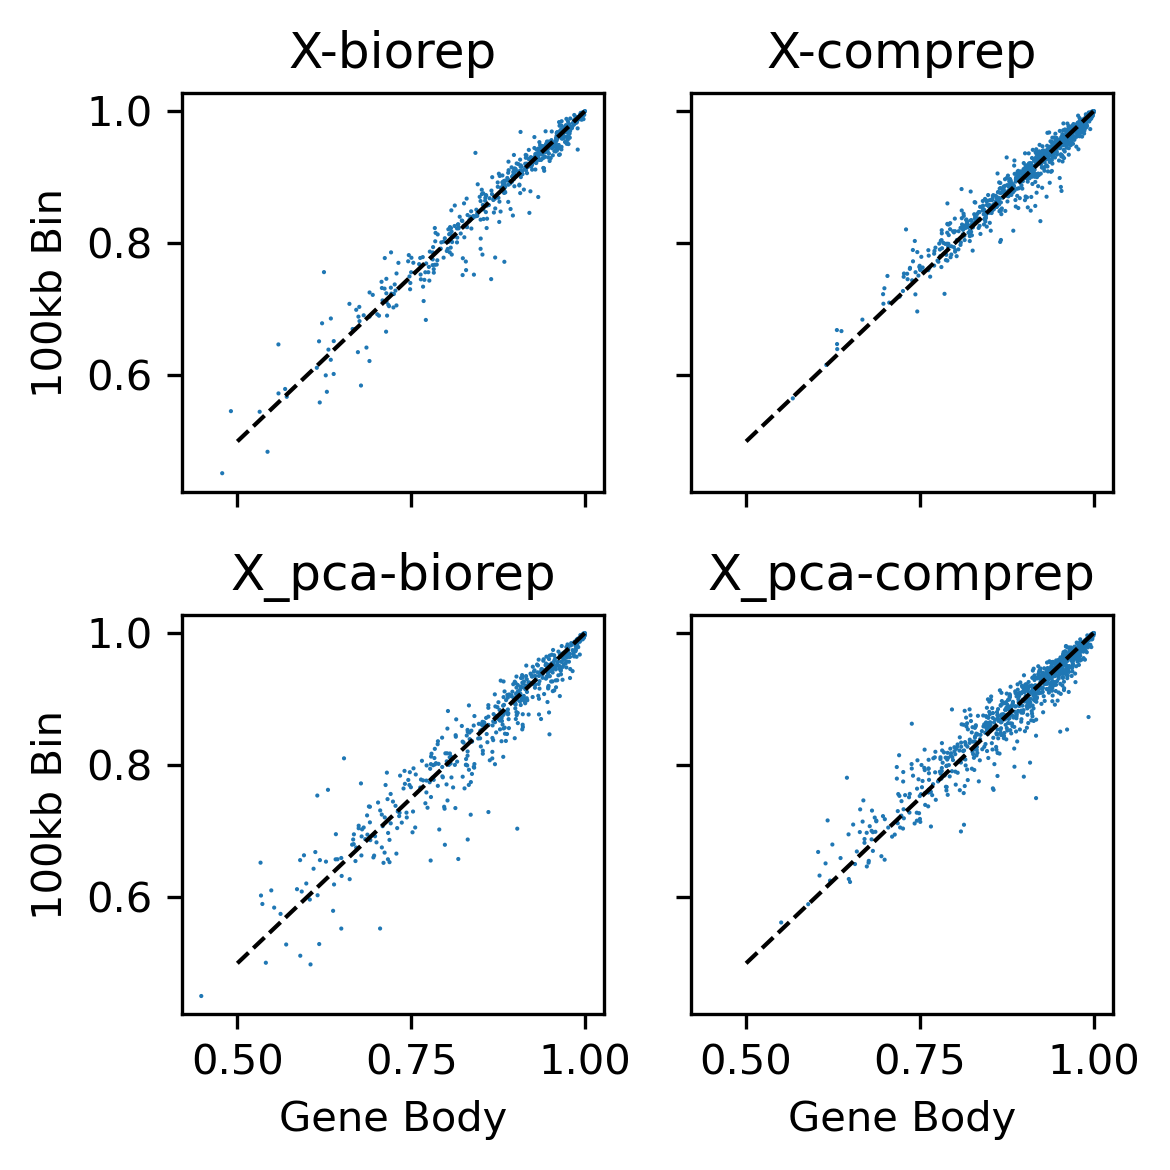

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(4,4), dpi=300, sharex='all', sharey='all')
tot = 0
for xx in ['X', 'X_pca']:
    for yy in ['biorep', 'comprep']:
        tmp = result[[f'geneCH-{xx}-{yy}', f'binCH-{xx}-{yy}']]
        tmp = tmp[tmp.isna().sum(axis=1)==0]
        ax = axes.flatten()[tot]
        ax.scatter(tmp.iloc[:,0], tmp.iloc[:,1], s=1, rasterized=True, edgecolor='none')
        ax.plot([0.5, 1], [0.5, 1], 'k--', linewidth=1)
        ax.set_title(f'{xx}-{yy}')
        tot += 1

for ax in axes[:,0]:
    ax.set_ylabel('100kb Bin')
for ax in axes[-1]:
    ax.set_xlabel('Gene Body')
    
plt.tight_layout()
plt.savefig('plot/compareroc_bin_gene.pdf', transparent=True)


In [10]:
for xx in ['X', 'X_pca']:
    for yy in ['biorep', 'comprep']:
        tmp = result[[f'geneCH-{xx}-{yy}', f'binCH-{xx}-{yy}']]
        tmp = tmp[tmp.isna().sum(axis=1)==0]
        print(xx, yy, spearmanr(tmp.iloc[:, 0], tmp.iloc[:, 1]))
        

X biorep SpearmanrResult(correlation=0.9763120062080727, pvalue=0.0)
X comprep SpearmanrResult(correlation=0.9755385021114608, pvalue=0.0)
X_pca biorep SpearmanrResult(correlation=0.961299492165875, pvalue=6.170046906381384e-290)
X_pca comprep SpearmanrResult(correlation=0.9626081403668202, pvalue=0.0)


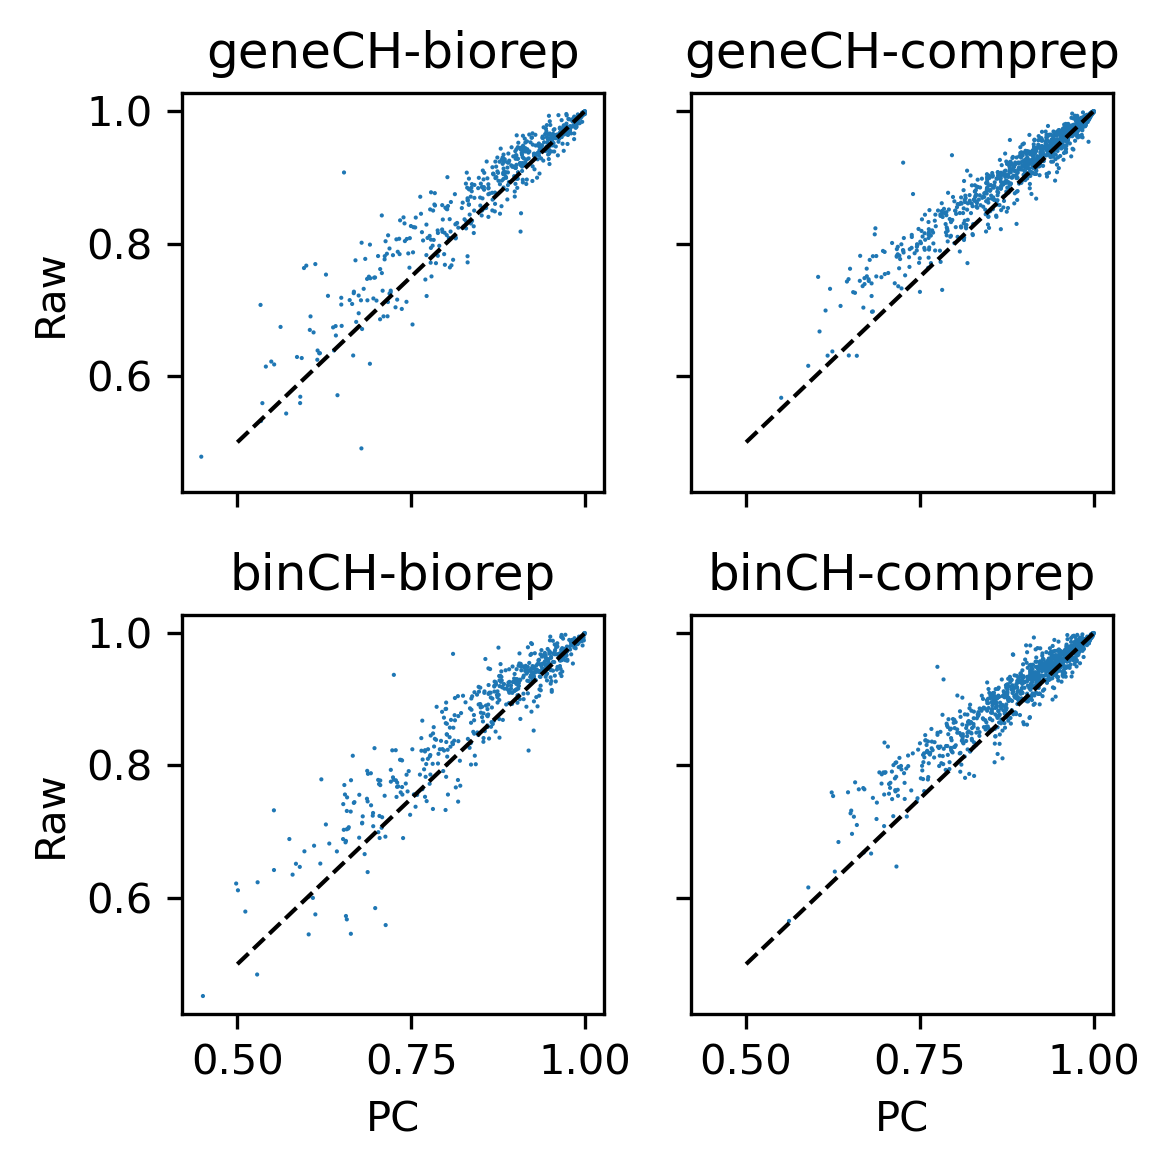

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(4,4), dpi=300, sharex='all', sharey='all')
tot = 0
for xx in ['geneCH', 'binCH']:
    for yy in ['biorep', 'comprep']:
        tmp = result[[f'{xx}-X_pca-{yy}', f'{xx}-X-{yy}']]
        tmp = tmp[tmp.isna().sum(axis=1)==0]
        ax = axes.flatten()[tot]
        ax.scatter(tmp.iloc[:,0], tmp.iloc[:,1], s=1, rasterized=True, edgecolor='none')
        ax.plot([0.5, 1], [0.5, 1], 'k--', linewidth=1)
        ax.set_title(f'{xx}-{yy}')
        tot += 1
        
for ax in axes[:,0]:
    ax.set_ylabel('Raw')
for ax in axes[-1]:
    ax.set_xlabel('PC')
    
plt.tight_layout()
plt.savefig('plot/compareroc_raw_pc.pdf', transparent=True)


In [8]:
for xx in ['geneCH', 'binCH']:
    for yy in ['biorep', 'comprep']:
        tmp = result[[f'{xx}-X_pca-{yy}', f'{xx}-X-{yy}']]
        tmp = tmp[tmp.isna().sum(axis=1)==0]
        print(xx, yy, spearmanr(tmp.iloc[:, 0], tmp.iloc[:, 1]))
        

geneCH biorep SpearmanrResult(correlation=0.9594181430246786, pvalue=9.597103819231413e-285)
geneCH comprep SpearmanrResult(correlation=0.9647342532435835, pvalue=0.0)
binCH biorep SpearmanrResult(correlation=0.9349637034860229, pvalue=1.703288170397803e-233)
binCH comprep SpearmanrResult(correlation=0.9473060794030246, pvalue=0.0)


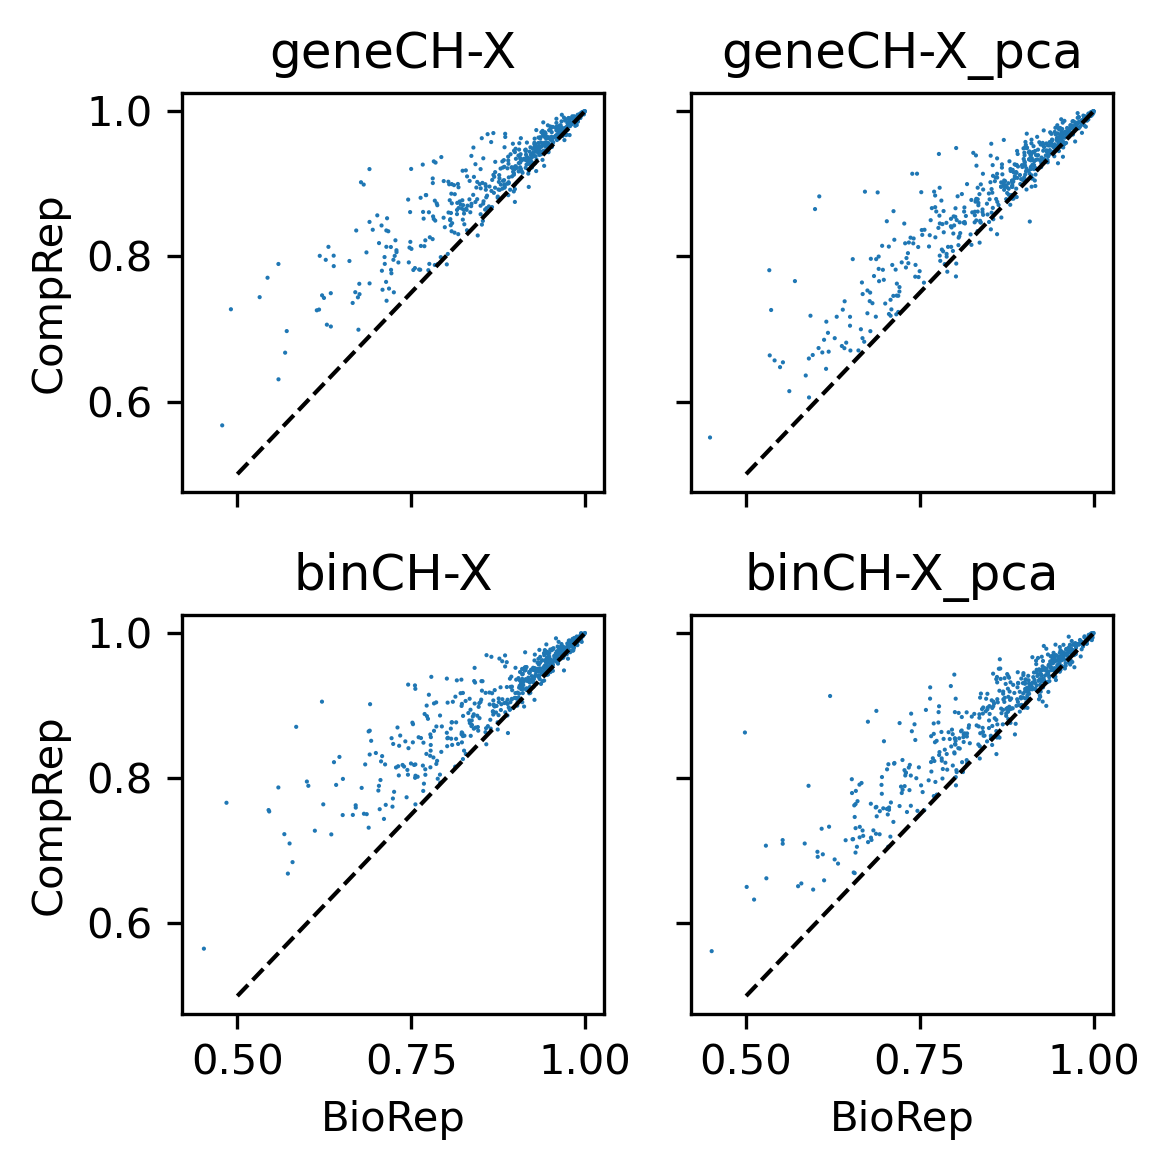

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(4,4), dpi=300, sharex='all', sharey='all')
tot = 0
for xx in ['geneCH', 'binCH']:
    for yy in ['X', 'X_pca']:
        tmp = result[[f'{xx}-{yy}-biorep', f'{xx}-{yy}-comprep']]
        tmp = tmp[tmp.isna().sum(axis=1)==0]
        ax = axes.flatten()[tot]
        ax.scatter(tmp.iloc[:,0], tmp.iloc[:,1], s=1, rasterized=True, edgecolor='none')
        ax.plot([0.5, 1], [0.5, 1], 'k--', linewidth=1)
        ax.set_title(f'{xx}-{yy}')
        tot += 1

for ax in axes[:,0]:
    ax.set_ylabel('CompRep')
for ax in axes[-1]:
    ax.set_xlabel('BioRep')

plt.tight_layout()
plt.savefig('plot/compareroc_comprep_biorep.pdf', transparent=True)


In [11]:
for xx in ['geneCH', 'binCH']:
    for yy in ['X', 'X_pca']:
        tmp = result[[f'{xx}-{yy}-biorep', f'{xx}-{yy}-comprep']]
        tmp = tmp[tmp.isna().sum(axis=1)==0]
        print(xx, yy, spearmanr(tmp.iloc[:, 0], tmp.iloc[:, 1]))
        

geneCH X SpearmanrResult(correlation=0.9468529458089215, pvalue=2.3803490662693986e-255)
geneCH X_pca SpearmanrResult(correlation=0.9544926550129202, pvalue=3.083802902982259e-272)
binCH X SpearmanrResult(correlation=0.9406617746814185, pvalue=2.1027923235695426e-243)
binCH X_pca SpearmanrResult(correlation=0.9499541432337805, pvalue=6.955575360745736e-262)


In [13]:
(~result.iloc[:, :8].isna()).sum(axis=0)

geneCH-X-biorep         516
geneCH-X_pca-biorep     516
geneCH-X-comprep        926
geneCH-X_pca-comprep    926
binCH-X-biorep          516
binCH-X_pca-biorep      516
binCH-X-comprep         926
binCH-X_pca-comprep     926
dtype: int64

In [9]:
meta_rs2 = pd.read_csv(
    "/cemba/CEMBA_RS2/cell_48032_RS2_meta_nooutlier.csv.gz", index_col=0, header=0
)
meta_rs2 = meta_rs2[meta_rs2["PassTargetFilter"]]
meta_rs2 = meta_rs2.rename(
    {
        "PlateNormReads": "PlateNormCov",
        "Exp": "Sample",
        "Source": "SubRegion",
        "Slice": "DissectionRegion",
    },
    axis=1,
)
meta_rs2


mCCCFrac   mCGFrac  \
cell                                                                     
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...  0.006500  0.775850   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...  0.006709  0.775146   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...  0.007131  0.775895   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...  0.006032  0.773345   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...  0.005007  0.773471   
...                                                      ...       ...   
Pool180_Plate9-6-M14-O24                            0.004759  0.737593   
Pool180_Plate9-6-M14-P11                            0.005464  0.759072   
Pool180_Plate9-6-M14-P12                            0.006196  0.792529   
Pool180_Plate9-6-M14-P23                            0.005446  0.782445   
Pool180_Plate9-6-M14-P24                            0.005324  0.781914   

                                                     mCHFrac  FinalmCReads  \
cell                                                                         
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...  0.032027     1090870.0   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...  0.034091     1458065.0   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...  0.035900     1614993.0   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...  0.028591     1598778.0   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...  0.022022      762007.0   
...                                                      ...           ...   
Pool180_Plate9-6-M14-O24                            0.018632     1237195.0   
Pool180_Plate9-6-M14-P11                            0.024842     1103912.0   
Pool180_Plate9-6-M14-P12                            0.029565      818886.0   
Pool180_Plate9-6-M14-P23                            0.026272      823254.0   
Pool180_Plate9-6-M14-P24                            0.022597      801671.0   

                                                             Plate  \
cell                                                                 
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...       180117_P1   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...       180117_P1   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...       180117_P1   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...       180117_P1   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...       180117_P2   
...                                                            ...   
Pool180_Plate9-6-M14-O24                            Pool180_Plate9   
Pool180_Plate9-6-M14-P11                            Pool180_Plate9   
Pool180_Plate9-6-M14-P12                            Pool180_Plate9   
Pool180_Plate9-6-M14-P23                            Pool180_Plate9   
Pool180_Plate9-6-M14-P24                            Pool180_Plate9   

                                                    PlateNormCov  \
cell                                                               
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...     -0.555116   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...     -0.136540   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...      0.010933   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...     -0.003626   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...     -1.169393   
...                                                          ...   
Pool180_Plate9-6-M14-O24                                0.305202   
Pool180_Plate9-6-M14-P11                                0.140754   
Pool180_Plate9-6-M14-P12                               -0.290136   
Pool180_Plate9-6-M14-P23                               -0.282461   
Pool180_Plate9-6-M14-P24                               -0.320788   

                                                            Sample SubRegion  \
cell                                                                           
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2...            Tm3C       MOp   
180118_CEMBA_mm_P56_P63_RS2_180117_P1_

In [11]:
os = []
for reg in region_to_subregion.keys():
    data = anndata.read_h5ad(
        glob(f"/home/jzhou_salk_edu/sky_workdir/221122-cemba-tenx-integration/{reg}/{reg}_*_rs1rs2rna.h5ad")[0]
    )
    data = data[data.obs.index.isin(meta_rs2.index)].copy()
    for t in region_to_subregion[reg]:
        selrs1 = rs1_subregion_dict[t]
        selrs2 = rs2_subregion_dict[t]
        tmp = data.obs.loc[
            ((data.obs["Study"] == "CEMBA_EpiRetro") & (data.obs["Slice"].isin(selrs2)))
        ]
        tartmp = [xx for xx in tarall if xx in tmp['Target'].values]
        nt = len(tartmp)
        count = tmp[['Target', 'leiden']].value_counts().unstack(fill_value=0).loc[tartmp].values
        count = count / count.sum(axis=1)[:, None]
        ostmp = [[f'{t}-{tartmp[i]}/{tartmp[j]}', count[[i,j]].min(axis=0).sum()] for i in range(nt-1) for j in range(i+1, nt)]
        os.append(pd.DataFrame(ostmp, columns=['', '1-OS']).set_index(''))
    print(reg)

os = pd.concat(os, axis=0)


CTX
HIP
RHP
OLF
PIR
STR
PAL
AMY
TH
HY
MB
HB


In [32]:
os = []
for reg in region_to_subregion.keys():
    data = anndata.read_h5ad(
        glob(f"/home/jzhou_salk_edu/sky_workdir/221122-cemba-tenx-integration/{reg}/{reg}_*_rs1rs2rna.h5ad")[0]
    )
    data = data[data.obs.index.isin(meta_rs2.index)].copy()
    for t in region_to_subregion[reg]:
        selrs1 = rs1_subregion_dict[t]
        selrs2 = rs2_subregion_dict[t]
        tmp = data.obs.loc[
            ((data.obs["Study"] == "CEMBA_EpiRetro") & (data.obs["Slice"].isin(selrs2)))
        ]
        tartmp = [xx for xx in tarall if xx in tmp['Target'].values]
        nt = len(tartmp)
        count = tmp[['Target', 'L4']].value_counts().unstack(fill_value=0).loc[tartmp].values
        count = count / count.sum(axis=1)[:, None]
        ostmp = [[f'{t}-{tartmp[i]}/{tartmp[j]}', count[[i,j]].min(axis=0).sum()] for i in range(nt-1) for j in range(i+1, nt)]
        os.append(pd.DataFrame(ostmp, columns=['', '1-L4OS']).set_index(''))
    print(reg)

os = pd.concat(os, axis=0)


CTX
HIP
RHP
OLF
PIR
STR
PAL
AMY
TH
HY
MB
HB


In [33]:
result = pd.concat([result, 1-os], axis=1)
result


geneCH-X-biorep  geneCH-X_pca-biorep  geneCH-X-comprep  \
MOp-SSp/ACA          0.621901             0.548823          0.746285   
MOp-SSp/AI           0.766732             0.599172          0.926386   
MOp-SSp/AUDp         0.981884             0.992547          0.992877   
MOp-SSp/STR          0.634431             0.617759          0.749251   
MOp-SSp/TH           0.971074             0.965575          0.976763   
...                       ...                  ...               ...   
P-TH/SC                   NaN                  NaN          0.967763   
P-HY/SC                   NaN                  NaN          0.907468   
P-SC/MY                   NaN                  NaN          0.908785   
P-SC/CBN                  NaN                  NaN          0.968160   
P-SC/CBX                  NaN                  NaN          0.987969   

              geneCH-X_pca-comprep  binCH-X-biorep  binCH-X_pca-biorep  \
MOp-SSp/ACA               0.647384        0.678847            0.610387   
MOp-SSp/AI                0.865105        0.779039            0.620839   
MOp-SSp/AUDp              0.996302        0.976891            0.986720   
MOp-SSp/STR               0.694646        0.623607            0.529154   
MOp-SSp/TH                0.975435        0.974149            0.937478   
...                            ...             ...                 ...   
P-TH/SC                   0.961914             NaN                 NaN   
P-HY/SC                   0.880807             NaN                 NaN   
P-SC/MY                   0.871548             NaN                 NaN   
P-SC/CBN                  0.955768             NaN                 NaN   
P-SC/CBX                  0.983035             NaN                 NaN   

              binCH-X-comprep  binCH-X_pca-comprep      1-OS Source Target1  \
MOp-SSp/ACA          0.786665             0.695199  0.271966    MOp     SSp   
MOp-SSp/AI           0.939647             0.913262  0.278356    MOp     SSp   
MOp-SSp/AUDp         0.989616             0.994117  0.658932    MOp     SSp   
MOp-SSp/STR          0.764011             0.662135  0.209263    MOp     SSp   
MOp-SSp/TH           0.978389             0.960891  0.834630    MOp     SSp   
...                       ...                  ...       ...    ...     ...   
P-TH/SC              0.970954             0.957614  0.437304      P      TH   
P-HY/SC              0.915684             0.883518  0.552644      P      HY   
P-SC/MY              0.915431             0.848717  0.443574      P      SC   
P-SC/CBN             0.957586             0.933392  0.608705      P      SC   
P-SC/CBX             0.988547             0.980420  0.943038      P      SC   

             Target2 SourceGroup TargetGroup    1-L4OS  
MOp-SSp/ACA      ACA         CTX        ITIT  0.326405  
MOp-SSp/AI        AI         CTX        ITIT  0.456783  
MOp-SSp/AUDp    AUDp         CTX        ITIT  0.709738  
MOp-SSp/STR      STR         CTX        ITIT  0.283685  
MOp-SSp/TH        TH         CTX        ITET  0.844332  
...              ...         ...         ...       ...  
P-TH/SC           SC          HB        ETET  0.567006  
P-HY/SC           SC          HB        ETET  0.658859  
P-SC/MY           MY          HB        ETET  0.722571  
P-SC/CBN         CBN          HB        ETCB  0.741424  
P-SC/CBX         CBX          HB        ETCB  0.951956  

[926 rows x 15 columns]

In [34]:
result.corr()

geneCH-X-biorep  geneCH-X_pca-biorep  geneCH-X-comprep  \
geneCH-X-biorep              1.000000             0.944419          0.926574   
geneCH-X_pca-biorep          0.944419             1.000000          0.898201   
geneCH-X-comprep             0.926574             0.898201          1.000000   
geneCH-X_pca-comprep         0.903515             0.939777          0.959605   
binCH-X-biorep               0.974175             0.907362          0.889819   
binCH-X_pca-biorep           0.924981             0.950272          0.873296   
binCH-X-comprep              0.911740             0.873104          0.976218   
binCH-X_pca-comprep          0.889521             0.903754          0.934126   
1-OS                         0.669849             0.644558          0.619425   
1-L4OS                       0.630713             0.610107          0.604344   

                      geneCH-X_pca-comprep  binCH-X-biorep  \
geneCH-X-biorep                   0.903515        0.974175   
geneCH-X_pca-biorep               0.939777        0.907362   
geneCH-X-comprep                  0.959605        0.889819   
geneCH-X_pca-comprep              1.000000        0.858818   
binCH-X-biorep                    0.858818        1.000000   
binCH-X_pca-biorep                0.895857        0.934062   
binCH-X-comprep                   0.930406        0.916429   
binCH-X_pca-comprep               0.957733        0.888460   
1-OS                              0.610724        0.695955   
1-L4OS                            0.596230        0.655227   

                      binCH-X_pca-biorep  binCH-X-comprep  \
geneCH-X-biorep                 0.924981         0.911740   
geneCH-X_pca-biorep             0.950272         0.873104   
geneCH-X-comprep                0.873296         0.976218   
geneCH-X_pca-comprep            0.895857         0.930406   
binCH-X-biorep                  0.934062         0.916429   
binCH-X_pca-biorep              1.000000         0.889630   
binCH-X-comprep                 0.889630         1.000000   
binCH-X_pca-comprep             0.935520         0.948708   
1-OS                            0.666601         0.637436   
1-L4OS                          0.635214         0.620845   

                      binCH-X_pca-comprep      1-OS    1-L4OS  
geneCH-X-biorep                  0.889521  0.669849  0.630713  
geneCH-X_pca-biorep              0.903754  0.644558  0.610107  
geneCH-X-comprep                 0.934126  0.619425  0.604344  
geneCH-X_pca-comprep             0.957733  0.610724  0.596230  
binCH-X-biorep                   0.888460  0.695955  0.655227  
binCH-X_pca-biorep               0.935520  0.666601  0.635214  
binCH-X-comprep                  0.948708  0.637436  0.620845  
binCH-X_pca-comprep              1.000000  0.617280  0.600588  
1-OS                             0.617280  1.000000  0.907950  
1-L4OS                           0.600588  0.907950  1.000000

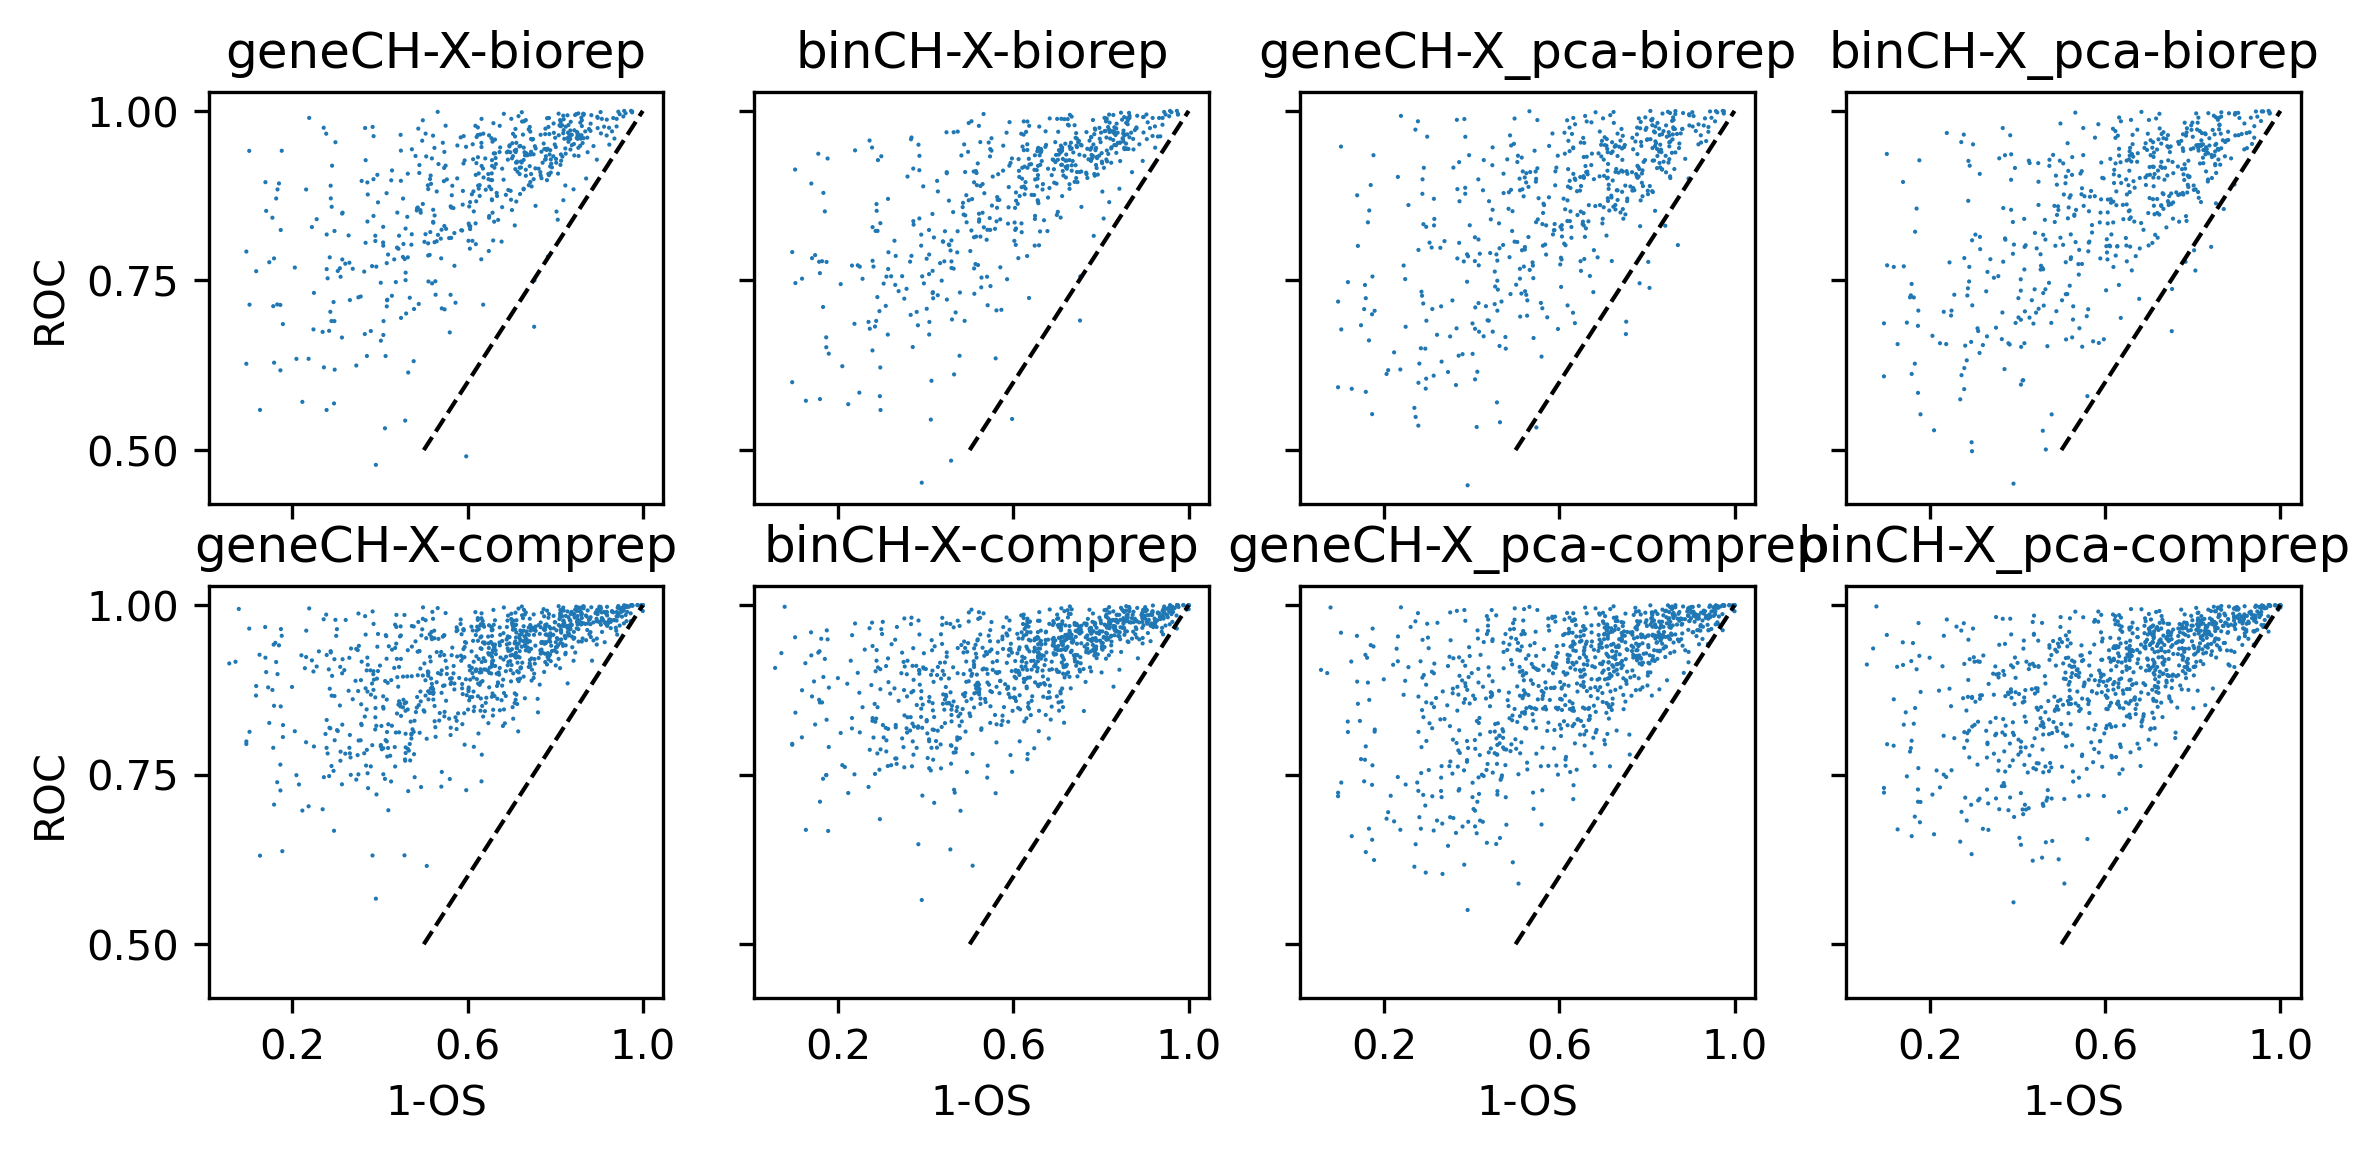

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(9,4), dpi=300, sharex='all', sharey='all')
tot = 0
for yy in ['biorep', 'comprep']:
    for xx in ['X', 'X_pca']:
        for zz in ['geneCH', 'binCH']:
            tmp = result[['1-OS', f'{zz}-{xx}-{yy}']]
            tmp = tmp[tmp.isna().sum(axis=1)==0]
            ax = axes.flatten()[tot]
            ax.scatter(tmp.iloc[:,0], tmp.iloc[:,1], s=1, rasterized=True, edgecolor='none')
            ax.plot([0.5, 1], [0.5, 1], 'k--', linewidth=1)
            ax.set_title(f'{zz}-{xx}-{yy}')
            tot += 1

ax.set_xticks([0.2, 0.6, 1.0])
ax.set_yticks([0.5, 0.75, 1.0])

for ax in axes[:,0]:
    ax.set_ylabel('ROC')
for ax in axes[-1]:
    ax.set_xlabel('1-OS')
# plt.tight_layout()


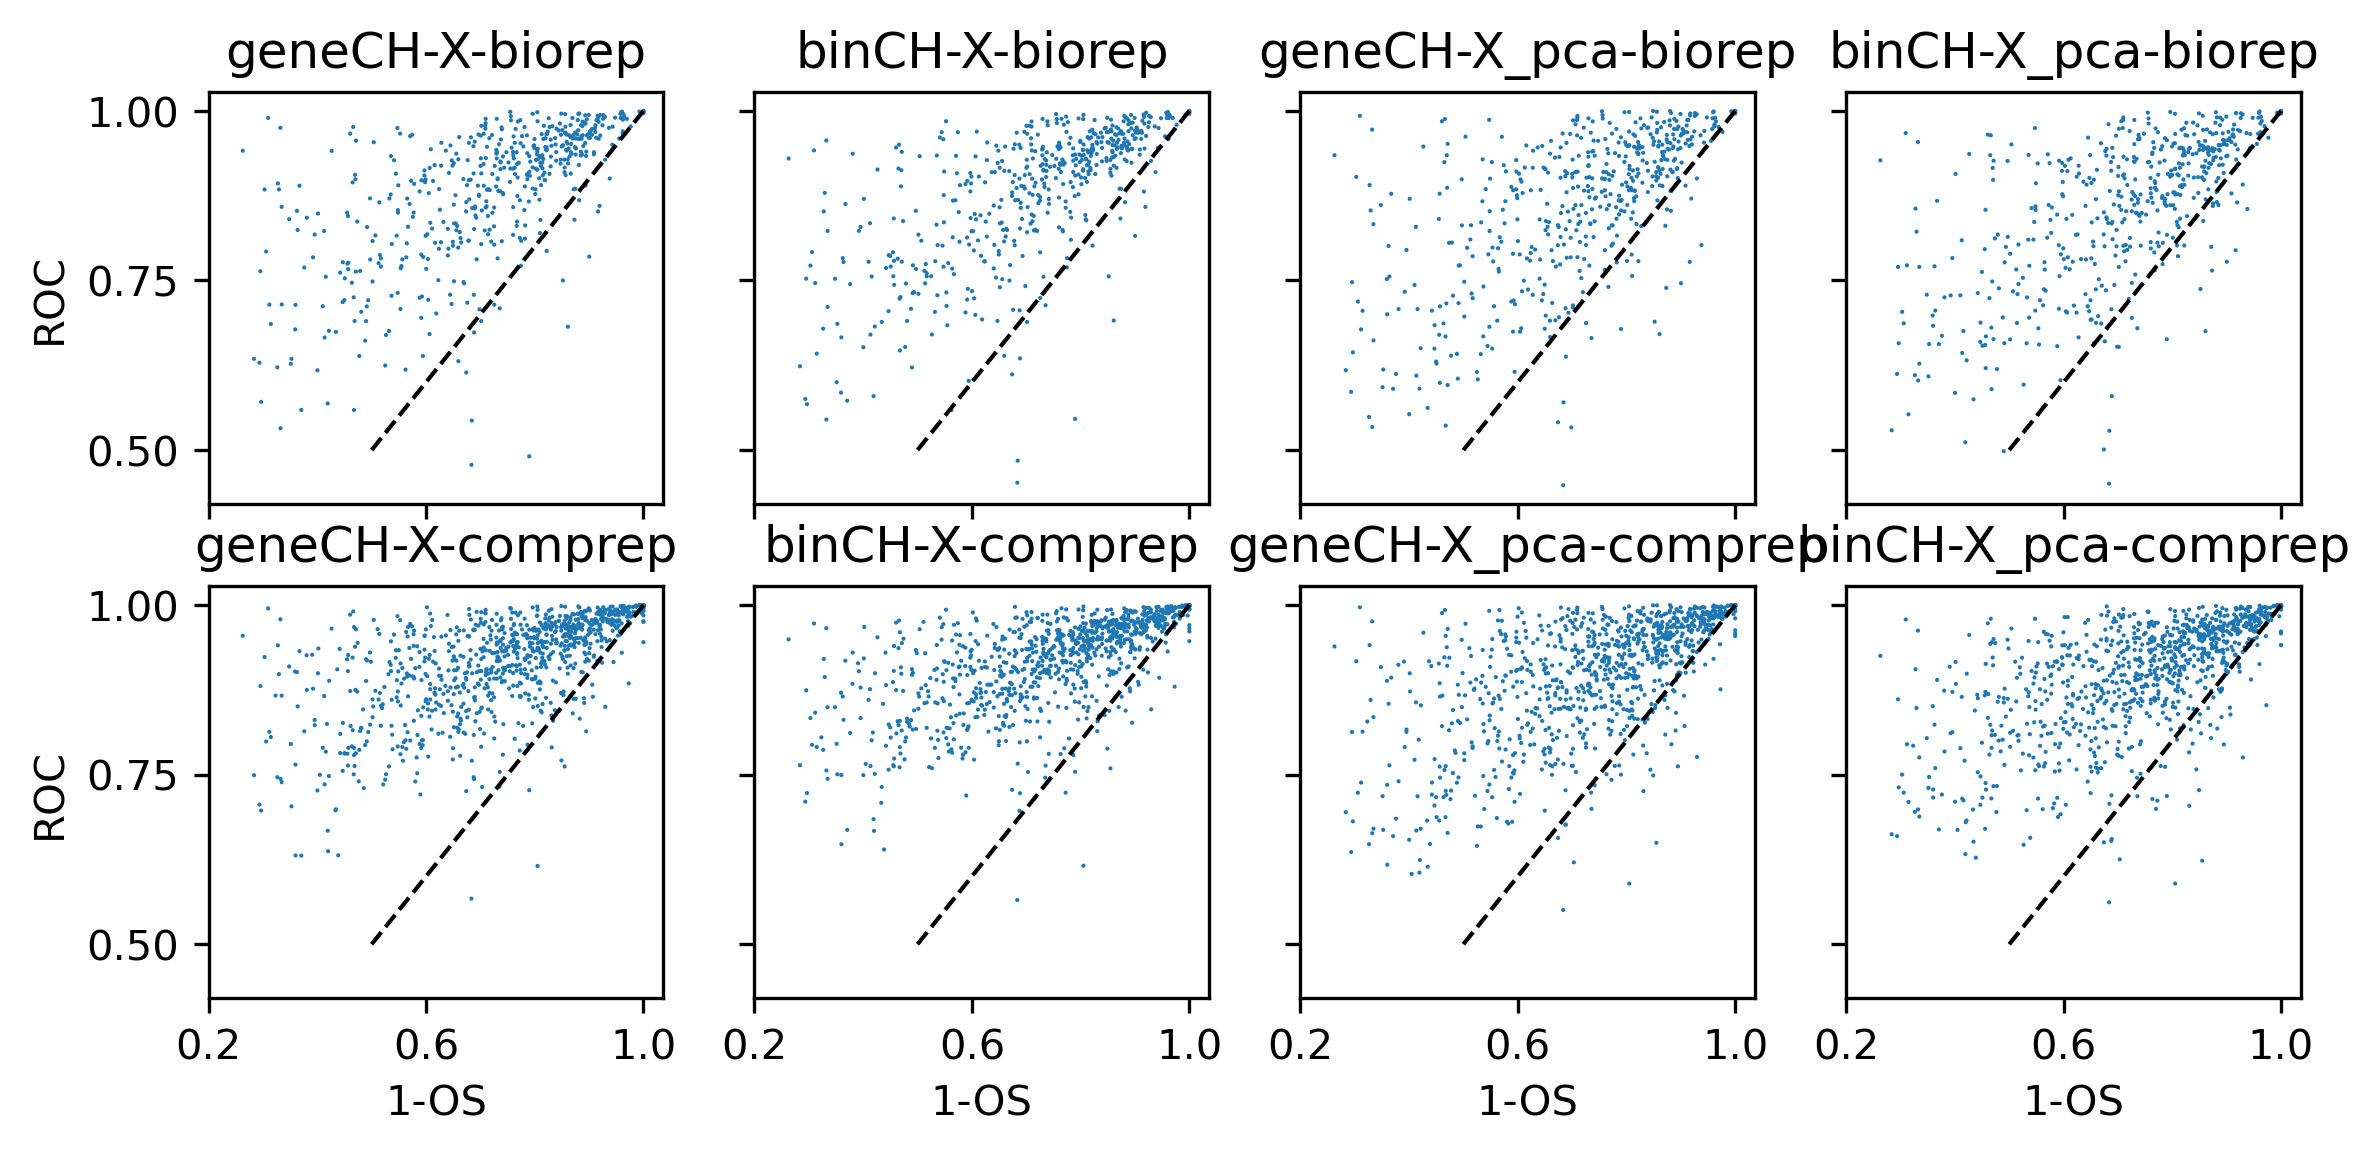

In [35]:
fig, axes = plt.subplots(2, 4, figsize=(9,4), dpi=300, sharex='all', sharey='all')
tot = 0
for yy in ['biorep', 'comprep']:
    for xx in ['X', 'X_pca']:
        for zz in ['geneCH', 'binCH']:
            tmp = result[['1-L4OS', f'{zz}-{xx}-{yy}']]
            tmp = tmp[tmp.isna().sum(axis=1)==0]
            ax = axes.flatten()[tot]
            ax.scatter(tmp.iloc[:,0], tmp.iloc[:,1], s=1, rasterized=True, edgecolor='none')
            ax.plot([0.5, 1], [0.5, 1], 'k--', linewidth=1)
            ax.set_title(f'{zz}-{xx}-{yy}')
            tot += 1

ax.set_xticks([0.2, 0.6, 1.0])
ax.set_yticks([0.5, 0.75, 1.0])

for ax in axes[:,0]:
    ax.set_ylabel('ROC')
for ax in axes[-1]:
    ax.set_xlabel('1-OS')
# plt.tight_layout()


In [17]:
tartype = {'IT':['PFC', 'MOp', 'SSp', 'ACA', 'AI', 'AUDp', 'RSP', 'PTLp', 'VISp', 'MOB', 'ENT', 'HPF', 'PIR', 'AMY', 'STR', 'PAL'],
           'ET':['TH', 'HY', 'SC', 'VTA', 'P', 'MY'], 
           'CB':['CBN', 'CBX']
          }
tarmap = {yy:xx for xx in tartype for yy in tartype[xx]}


In [18]:
regmap = {xx:reg for reg in region_to_subregion.keys() for xx in region_to_subregion[reg]}


In [19]:
group = []
for xx in result.index:
    reg, tar = xx.split('-')
    tar = tar.split('/')
    group.append([reg, tar[0], tar[1], regmap[reg], f'{tarmap[tar[0]]}{tarmap[tar[1]]}'])

group = pd.DataFrame(group, columns=['Source', 'Target1', 'Target2', 'SourceGroup', 'TargetGroup'], index=result.index)
group


Source Target1 Target2 SourceGroup TargetGroup
MOp-SSp/ACA     MOp     SSp     ACA         CTX        ITIT
MOp-SSp/AI      MOp     SSp      AI         CTX        ITIT
MOp-SSp/AUDp    MOp     SSp    AUDp         CTX        ITIT
MOp-SSp/STR     MOp     SSp     STR         CTX        ITIT
MOp-SSp/TH      MOp     SSp      TH         CTX        ITET
...             ...     ...     ...         ...         ...
P-TH/SC           P      TH      SC          HB        ETET
P-HY/SC           P      HY      SC          HB        ETET
P-SC/MY           P      SC      MY          HB        ETET
P-SC/CBN          P      SC     CBN          HB        ETCB
P-SC/CBX          P      SC     CBX          HB        ETCB

[926 rows x 5 columns]

In [20]:
result = pd.concat([result, group], axis=1)
result


geneCH-X-biorep  geneCH-X_pca-biorep  geneCH-X-comprep  \
MOp-SSp/ACA          0.621901             0.548823          0.746285   
MOp-SSp/AI           0.766732             0.599172          0.926386   
MOp-SSp/AUDp         0.981884             0.992547          0.992877   
MOp-SSp/STR          0.634431             0.617759          0.749251   
MOp-SSp/TH           0.971074             0.965575          0.976763   
...                       ...                  ...               ...   
P-TH/SC                   NaN                  NaN          0.967763   
P-HY/SC                   NaN                  NaN          0.907468   
P-SC/MY                   NaN                  NaN          0.908785   
P-SC/CBN                  NaN                  NaN          0.968160   
P-SC/CBX                  NaN                  NaN          0.987969   

              geneCH-X_pca-comprep  binCH-X-biorep  binCH-X_pca-biorep  \
MOp-SSp/ACA               0.647384        0.678847            0.610387   
MOp-SSp/AI                0.865105        0.779039            0.620839   
MOp-SSp/AUDp              0.996302        0.976891            0.986720   
MOp-SSp/STR               0.694646        0.623607            0.529154   
MOp-SSp/TH                0.975435        0.974149            0.937478   
...                            ...             ...                 ...   
P-TH/SC                   0.961914             NaN                 NaN   
P-HY/SC                   0.880807             NaN                 NaN   
P-SC/MY                   0.871548             NaN                 NaN   
P-SC/CBN                  0.955768             NaN                 NaN   
P-SC/CBX                  0.983035             NaN                 NaN   

              binCH-X-comprep  binCH-X_pca-comprep      1-OS Source Target1  \
MOp-SSp/ACA          0.786665             0.695199  0.271966    MOp     SSp   
MOp-SSp/AI           0.939647             0.913262  0.278356    MOp     SSp   
MOp-SSp/AUDp         0.989616             0.994117  0.658932    MOp     SSp   
MOp-SSp/STR          0.764011             0.662135  0.209263    MOp     SSp   
MOp-SSp/TH           0.978389             0.960891  0.834630    MOp     SSp   
...                       ...                  ...       ...    ...     ...   
P-TH/SC              0.970954             0.957614  0.437304      P      TH   
P-HY/SC              0.915684             0.883518  0.552644      P      HY   
P-SC/MY              0.915431             0.848717  0.443574      P      SC   
P-SC/CBN             0.957586             0.933392  0.608705      P      SC   
P-SC/CBX             0.988547             0.980420  0.943038      P      SC   

             Target2 SourceGroup TargetGroup  
MOp-SSp/ACA      ACA         CTX        ITIT  
MOp-SSp/AI        AI         CTX        ITIT  
MOp-SSp/AUDp    AUDp         CTX        ITIT  
MOp-SSp/STR      STR         CTX        ITIT  
MOp-SSp/TH        TH         CTX        ITET  
...              ...         ...         ...  
P-TH/SC           SC          HB        ETET  
P-HY/SC           SC          HB        ETET  
P-SC/MY           MY          HB        ETET  
P-SC/CBN         CBN          HB        ETCB  
P-SC/CBX         CBX          HB        ETCB  

[926 rows x 14 columns]

In [21]:
targroup = group['TargetGroup'].value_counts().index
colorsg = {xx:yy for xx,yy in zip(region_to_subregion.keys(), sns.color_palette('tab20', len(region_to_subregion)))}
colortg = {xx:yy for xx,yy in zip(targroup, sns.color_palette('tab10', len(targroup)))}


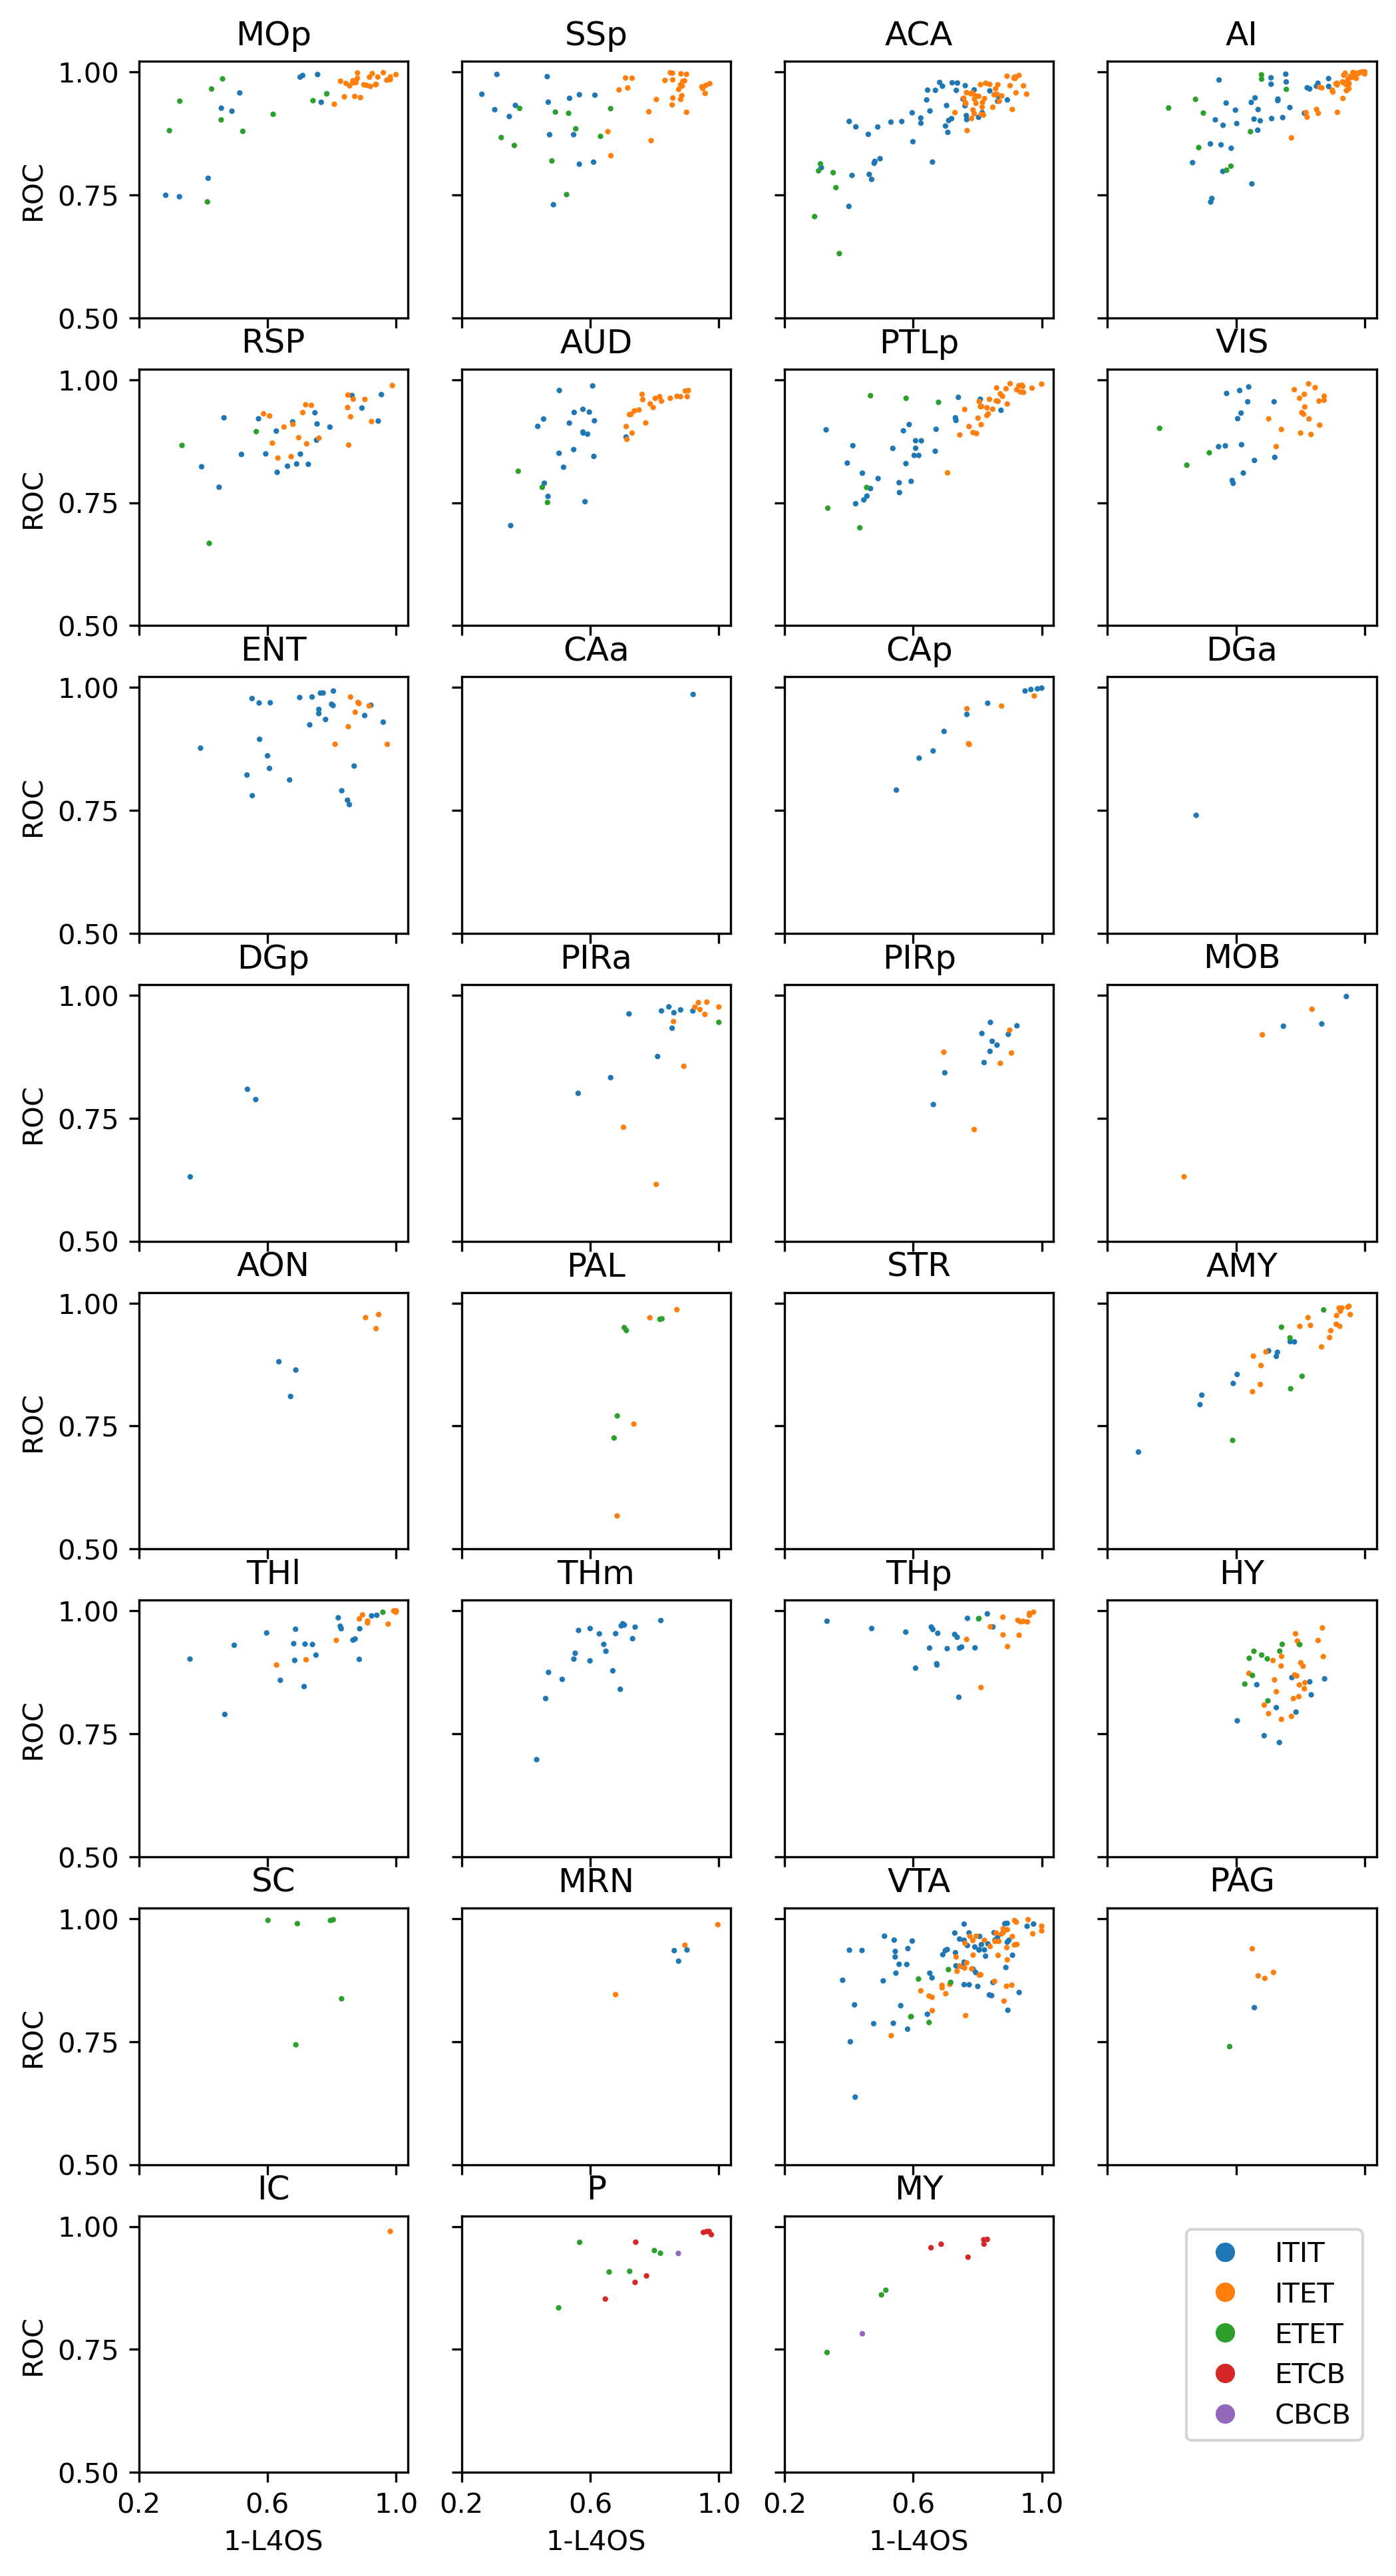

In [40]:
ncol = 4
nrow = (len(rs1_subregion_dict) - 1)//ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(ncol*2, nrow*2), dpi=300, sharex='all', sharey='all')
tot = 0
for i,reg in enumerate(rs1_subregion_dict.keys()):
    ax = axes.flatten()[i]
    for k,tar in enumerate(targroup):
        tmp = result.loc[(result['TargetGroup']==tar) & (result['Source']==reg), ['1-L4OS', 'geneCH-X-comprep']]
        if tmp.shape[0]==0:
            continue
        tmp = tmp[tmp.isna().sum(axis=1)==0]
        ax.scatter(tmp.iloc[:,0], tmp.iloc[:,1], s=4, color=colortg[tar], rasterized=True, edgecolor='none', label=targroup[k])
    # ax.plot([0.5, 1], [0.5, 1], 'k--', linewidth=1)
    ax.set_title(reg)

ax.set_xticks([0.2, 0.6, 1.0])
ax.set_yticks([0.5, 0.75, 1.0])
for ax in axes[:,0]:
    ax.set_ylabel('ROC')
for ax in axes[-1]:
    ax.set_xlabel('1-L4OS')

markers = [
    plt.Line2D([0, 0], [0, 0], color=color, marker="o", linestyle="")
    for color in colortg.values()
]

# if len(target_list)<=ncol:
#     ax = axes[len(target_list)-1]
# else:
#     ax = axes[0, -1]
ax = axes.flatten()[-1]
ax.axis('off')
ax.legend(
    markers, colortg.keys(), numpoints=1, 
    # bbox_to_anchor=(1, 1), loc="upper left"
)

# plt.tight_layout()
plt.savefig('plot/source_majortargroup_L4OSvsROC.pdf', transparent=True)


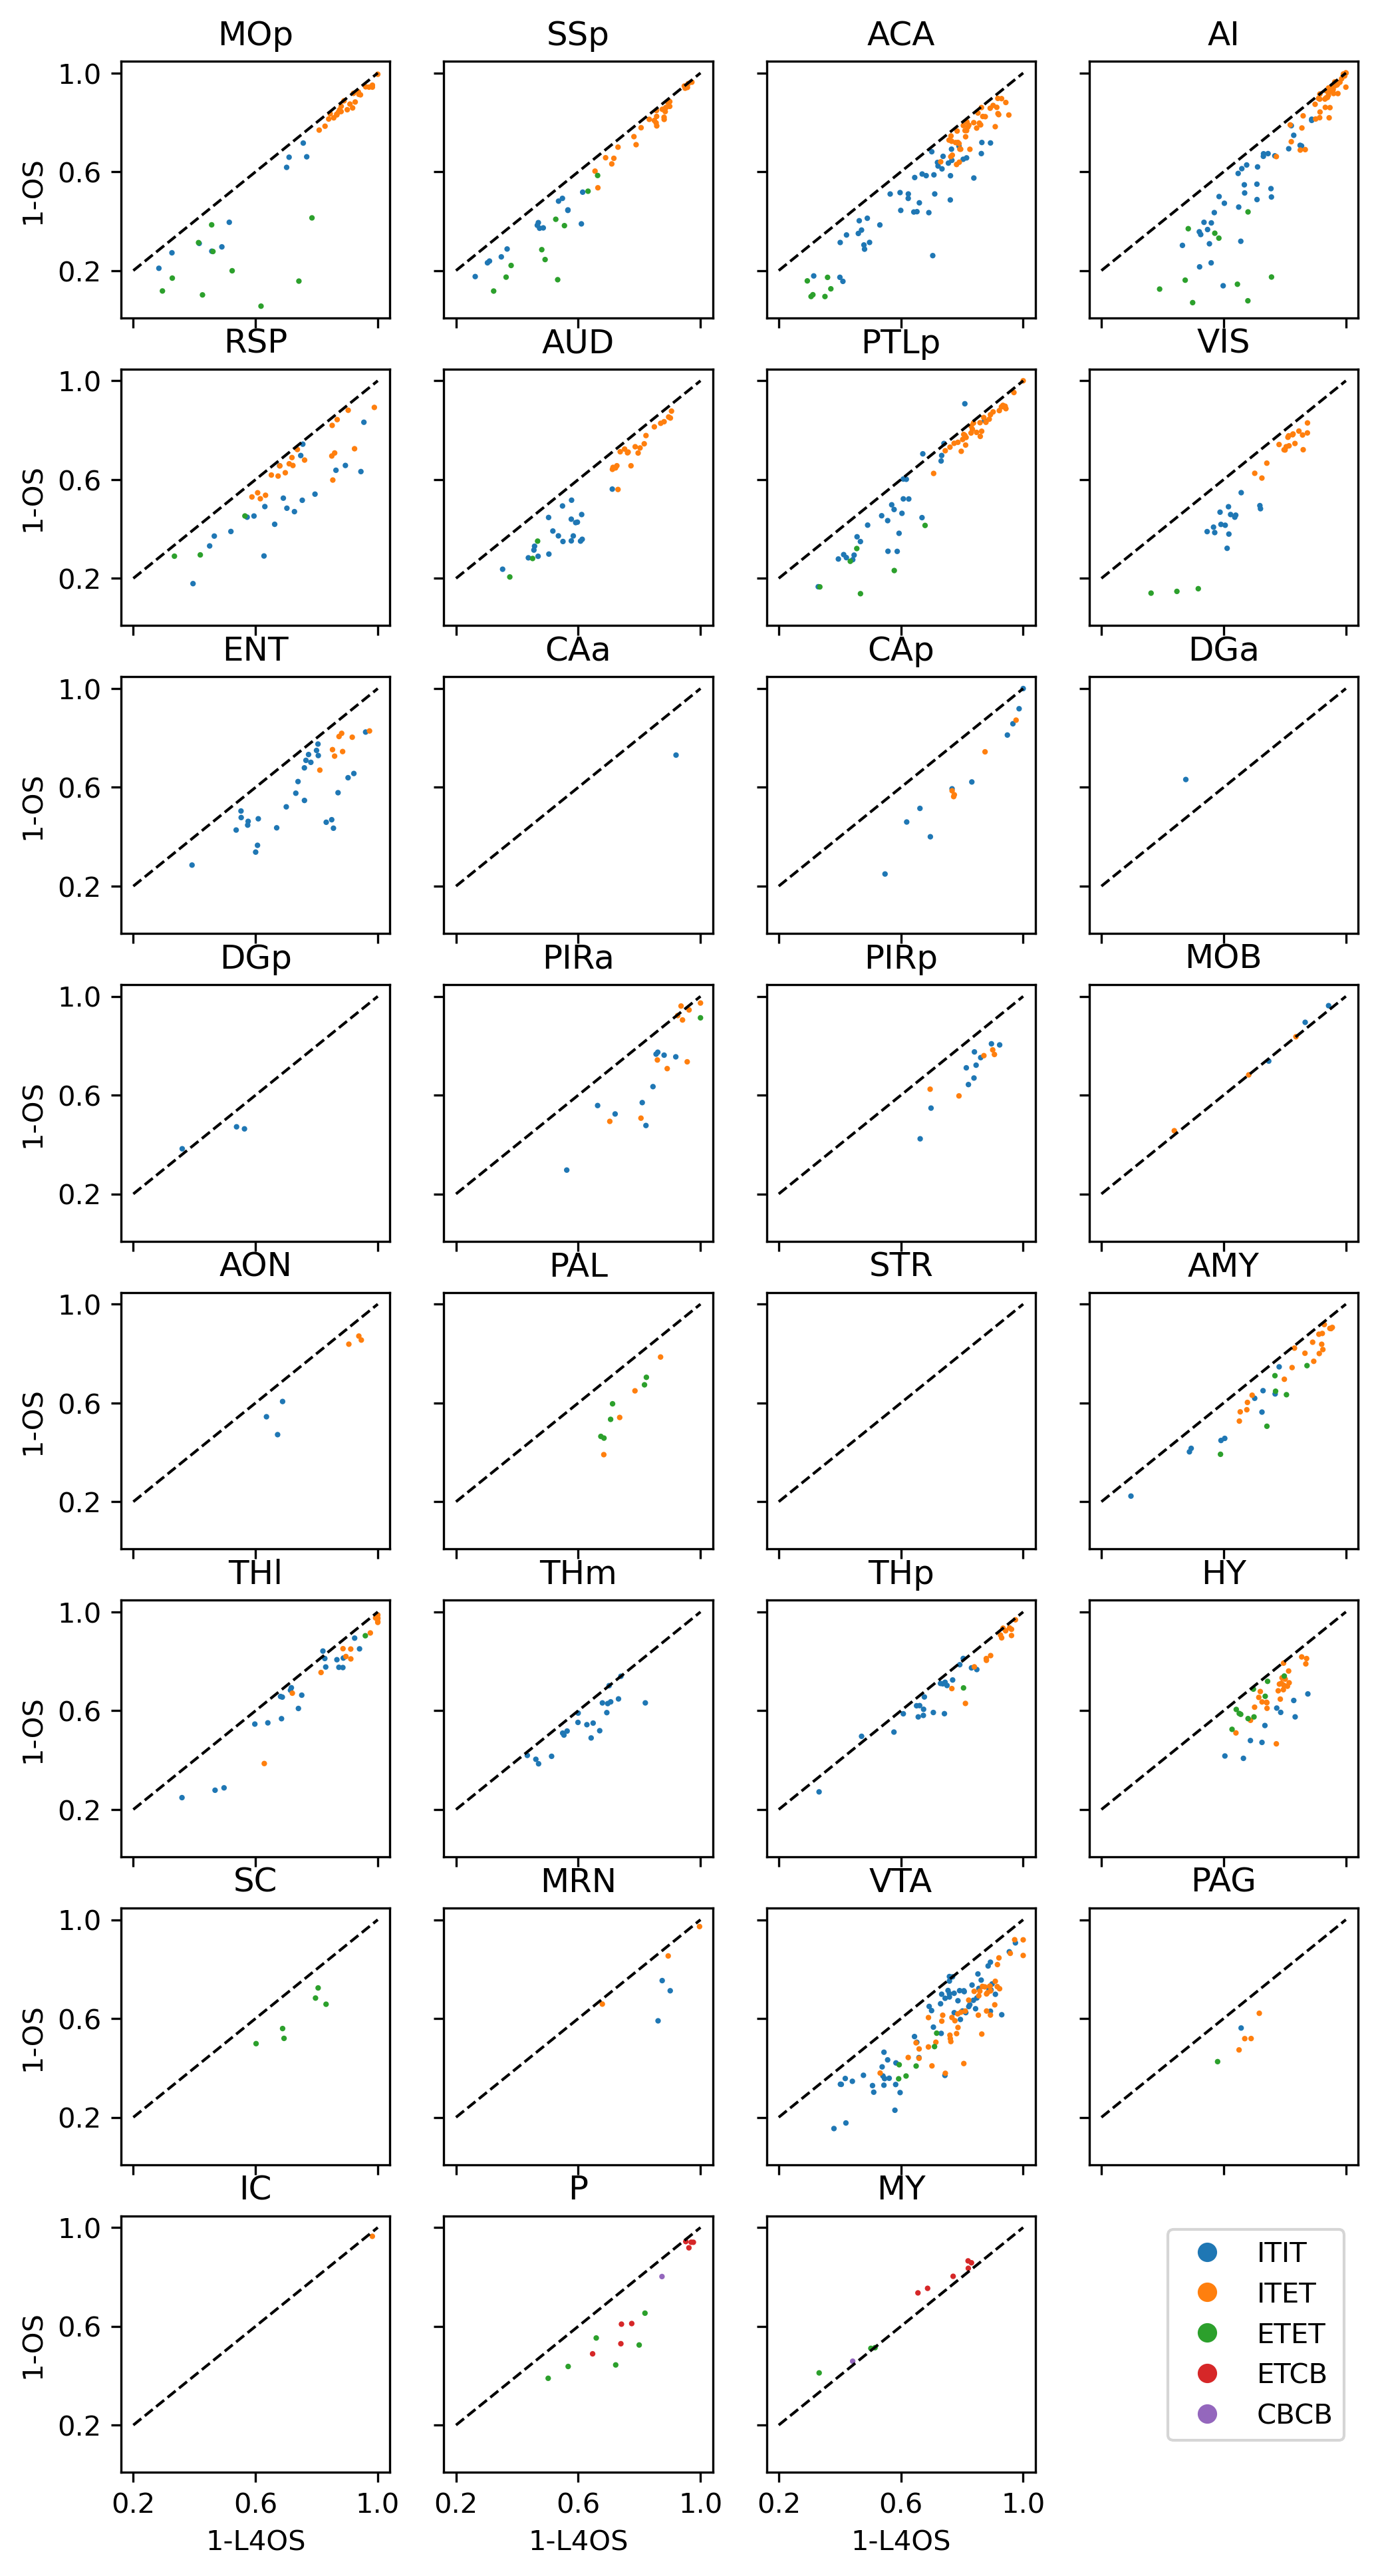

In [39]:
ncol = 4
nrow = (len(rs1_subregion_dict) - 1)//ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(ncol*2, nrow*2), dpi=300, sharex='all', sharey='all')
tot = 0
for i,reg in enumerate(rs1_subregion_dict.keys()):
    ax = axes.flatten()[i]
    for k,tar in enumerate(targroup):
        tmp = result.loc[(result['TargetGroup']==tar) & (result['Source']==reg), ['1-L4OS', '1-OS']]
        if tmp.shape[0]==0:
            continue
        tmp = tmp[tmp.isna().sum(axis=1)==0]
        ax.scatter(tmp.iloc[:,0], tmp.iloc[:,1], s=4, color=colortg[tar], rasterized=True, edgecolor='none', label=targroup[k])
    ax.plot([0.2, 1], [0.2, 1], 'k--', linewidth=1)
    ax.set_title(reg)

ax.set_xticks([0.2, 0.6, 1.0])
ax.set_yticks([0.2, 0.6, 1.0])
for ax in axes[:,0]:
    ax.set_ylabel('1-OS')
for ax in axes[-1]:
    ax.set_xlabel('1-L4OS')

markers = [
    plt.Line2D([0, 0], [0, 0], color=color, marker="o", linestyle="")
    for color in colortg.values()
]

# if len(target_list)<=ncol:
#     ax = axes[len(target_list)-1]
# else:
#     ax = axes[0, -1]
ax = axes.flatten()[-1]
ax.axis('off')
ax.legend(
    markers, colortg.keys(), numpoints=1, 
    # bbox_to_anchor=(1, 1), loc="upper left"
)

# plt.tight_layout()
plt.savefig('plot/source_majortargroup_L4OSvsLeidenOS.pdf', transparent=True)


In [41]:
result.to_hdf('result.hdf', key='data')


In [15]:
regall = np.concatenate([region_to_subregion[xx] for xx in region_to_subregion if xx!='STR'])
print(len(regall))

30


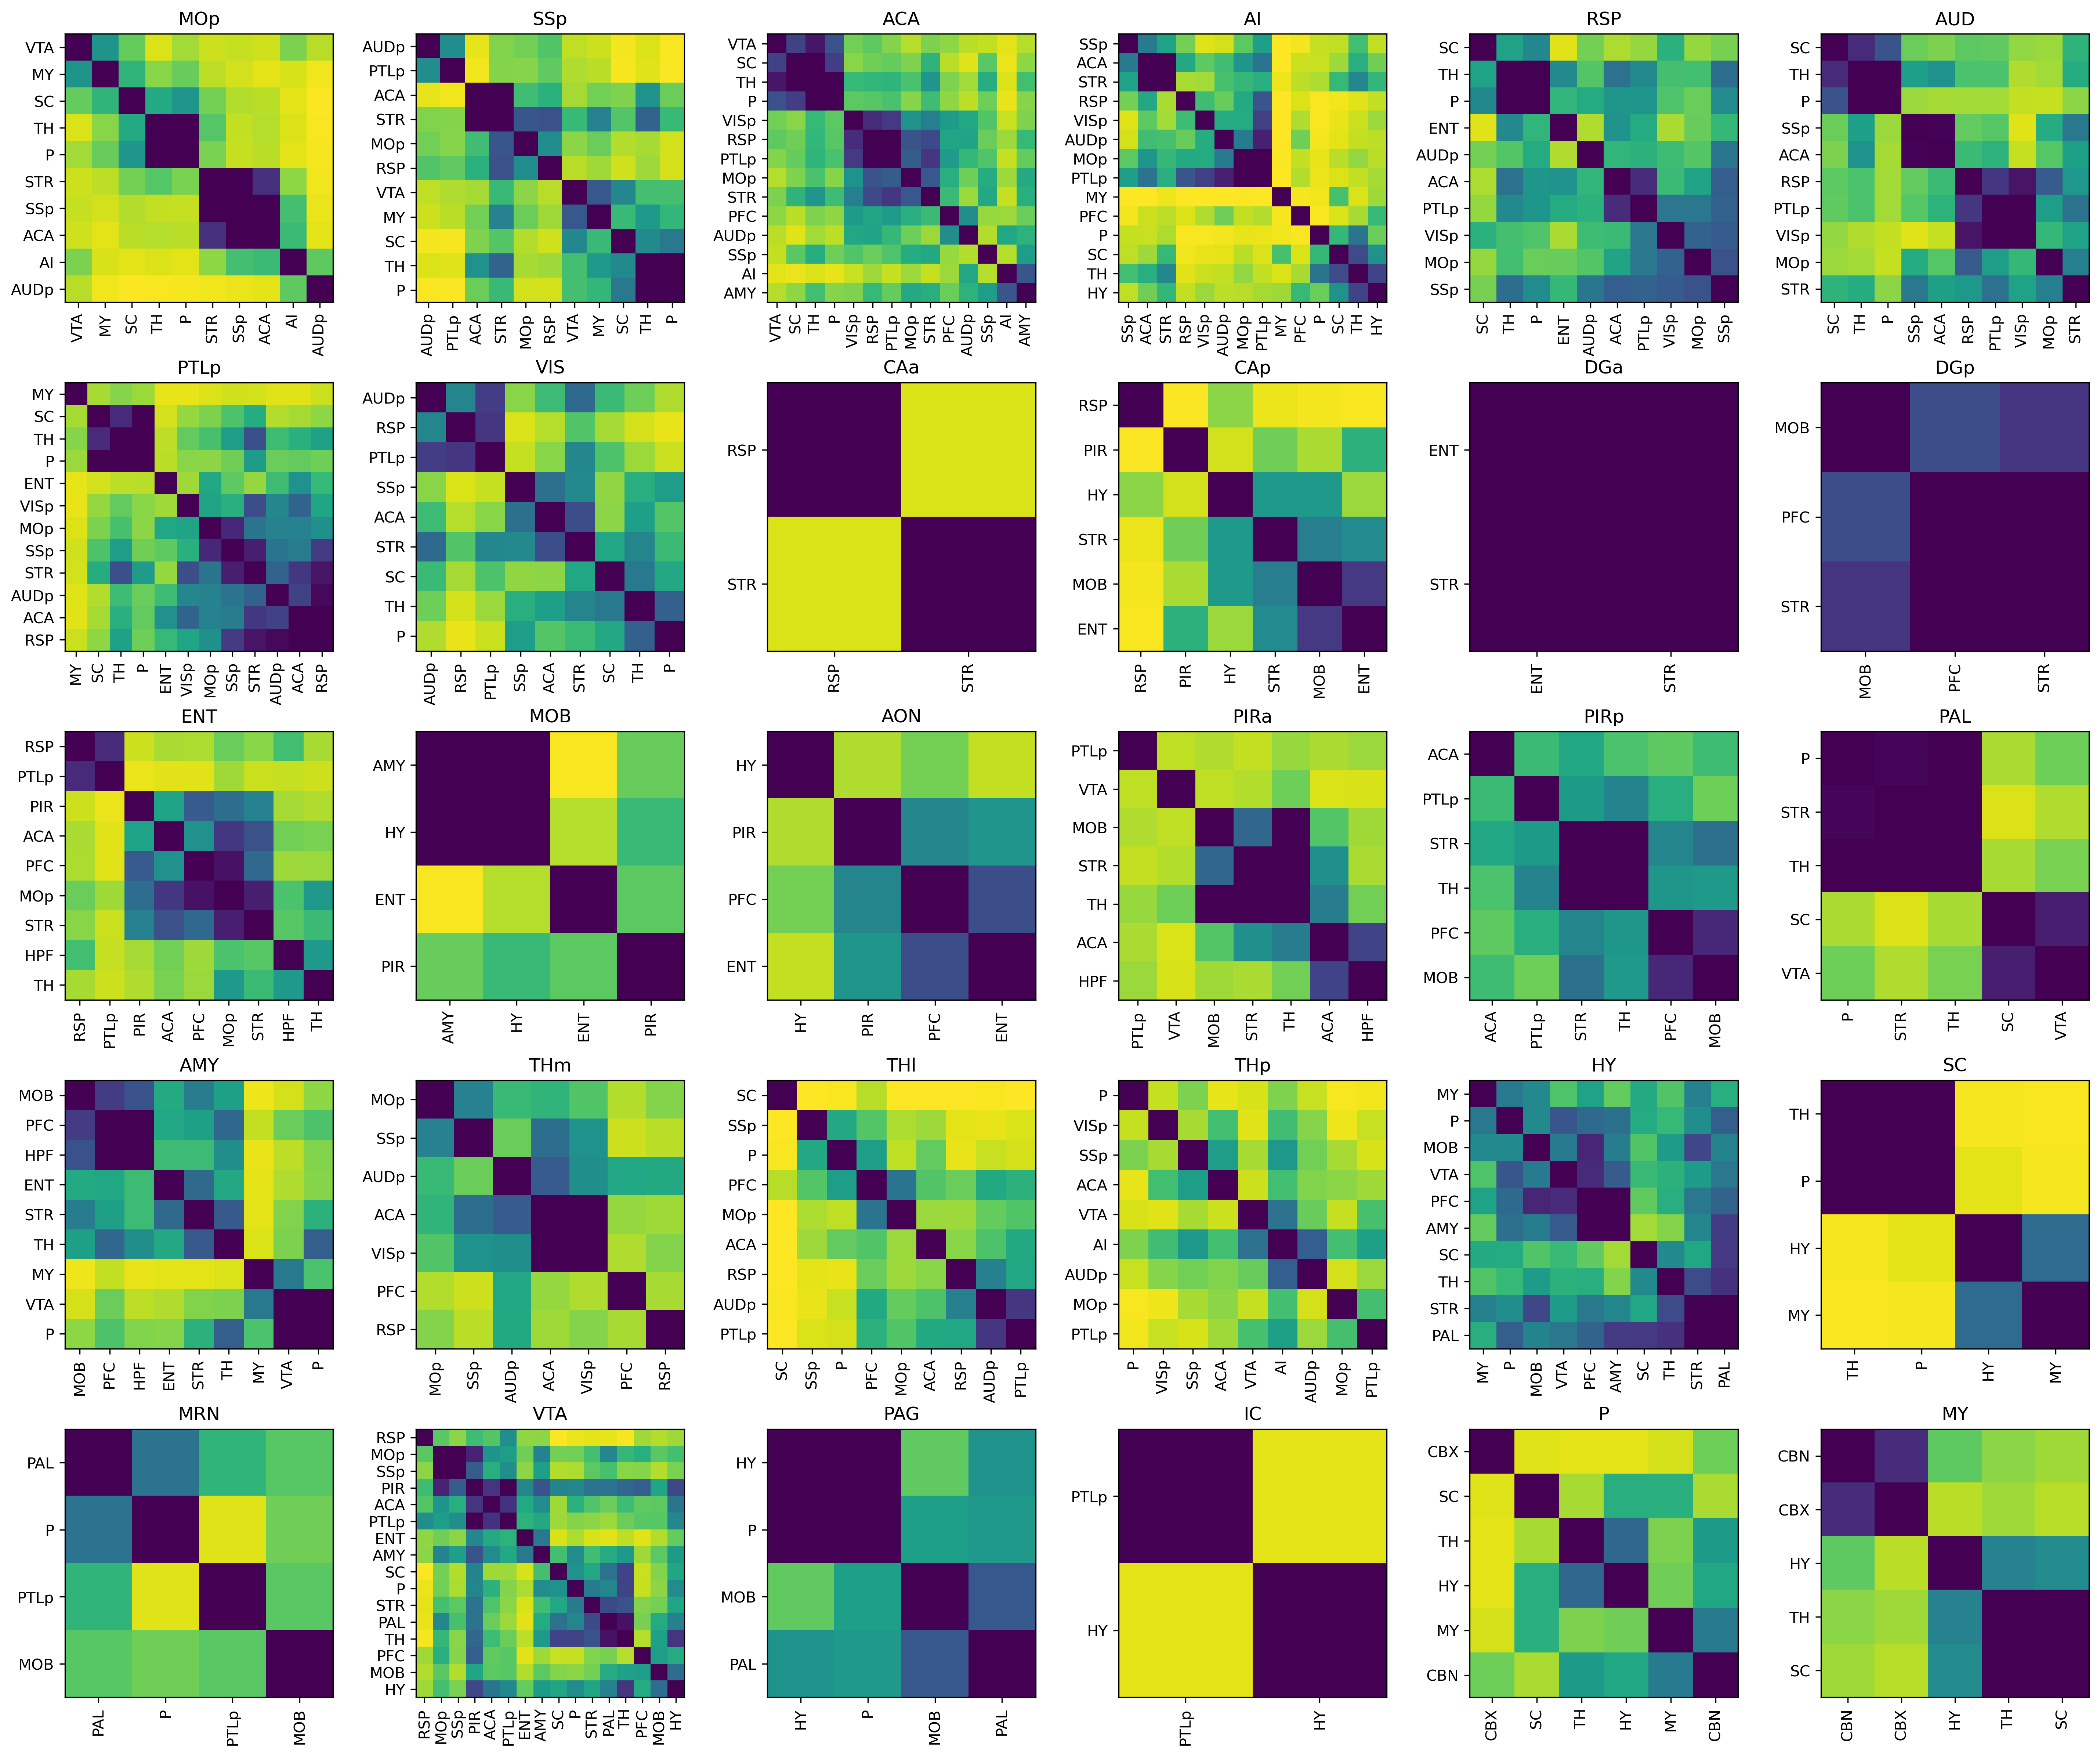

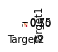

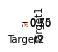

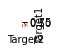

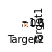

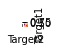

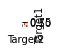

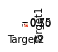

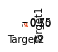

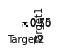

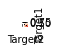

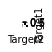

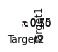

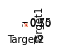

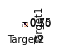

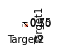

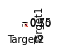

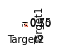

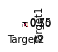

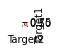

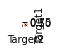

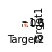

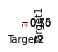

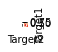

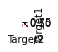

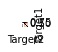

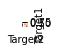

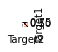

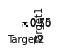

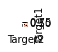

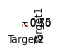

In [17]:
fig, axes = plt.subplots(5, 6, figsize=(24, 20), dpi=300, gridspec_kw={'hspace':0.3})
for i,reg in enumerate(regall):
    tmp = result.loc[result['Source']==reg].fillna(0.5)
    tartmp = np.array([xx for xx in tarall if (xx in tmp['Target1'].values) or (xx in tmp['Target2'].values)])
    tmp = pd.concat([tmp, tmp.rename({'Target1':'Target2', 'Target2':'Target1'}, axis=1)], axis=0)
    
    data = tmp.set_index(['Target1', 'Target2'])['geneCH-X-comprep'].unstack().loc[tartmp, tartmp].fillna(0.5)
    cg = sns.clustermap(data, figsize=(0.1, 0.1))
    corder = cg.dendrogram_col.reordered_ind
    del cg
    # rorder = cg.dendrogram_row.reordered_ind
    ax = axes.flatten()[i]
    ax.imshow(data.values[corder][:, corder], cmap='viridis', vmin=0.75, vmax=1.0)
    ax.set_xticks(np.arange(data.shape[0]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(tartmp[corder], rotation=90, ha='center')
    ax.set_yticklabels(tartmp[corder])
    ax.set_title(reg)

# plt.tight_layout()
fig.savefig('plot/TargetPair_comprepgeneraw_ROC.pdf', transparent='True')


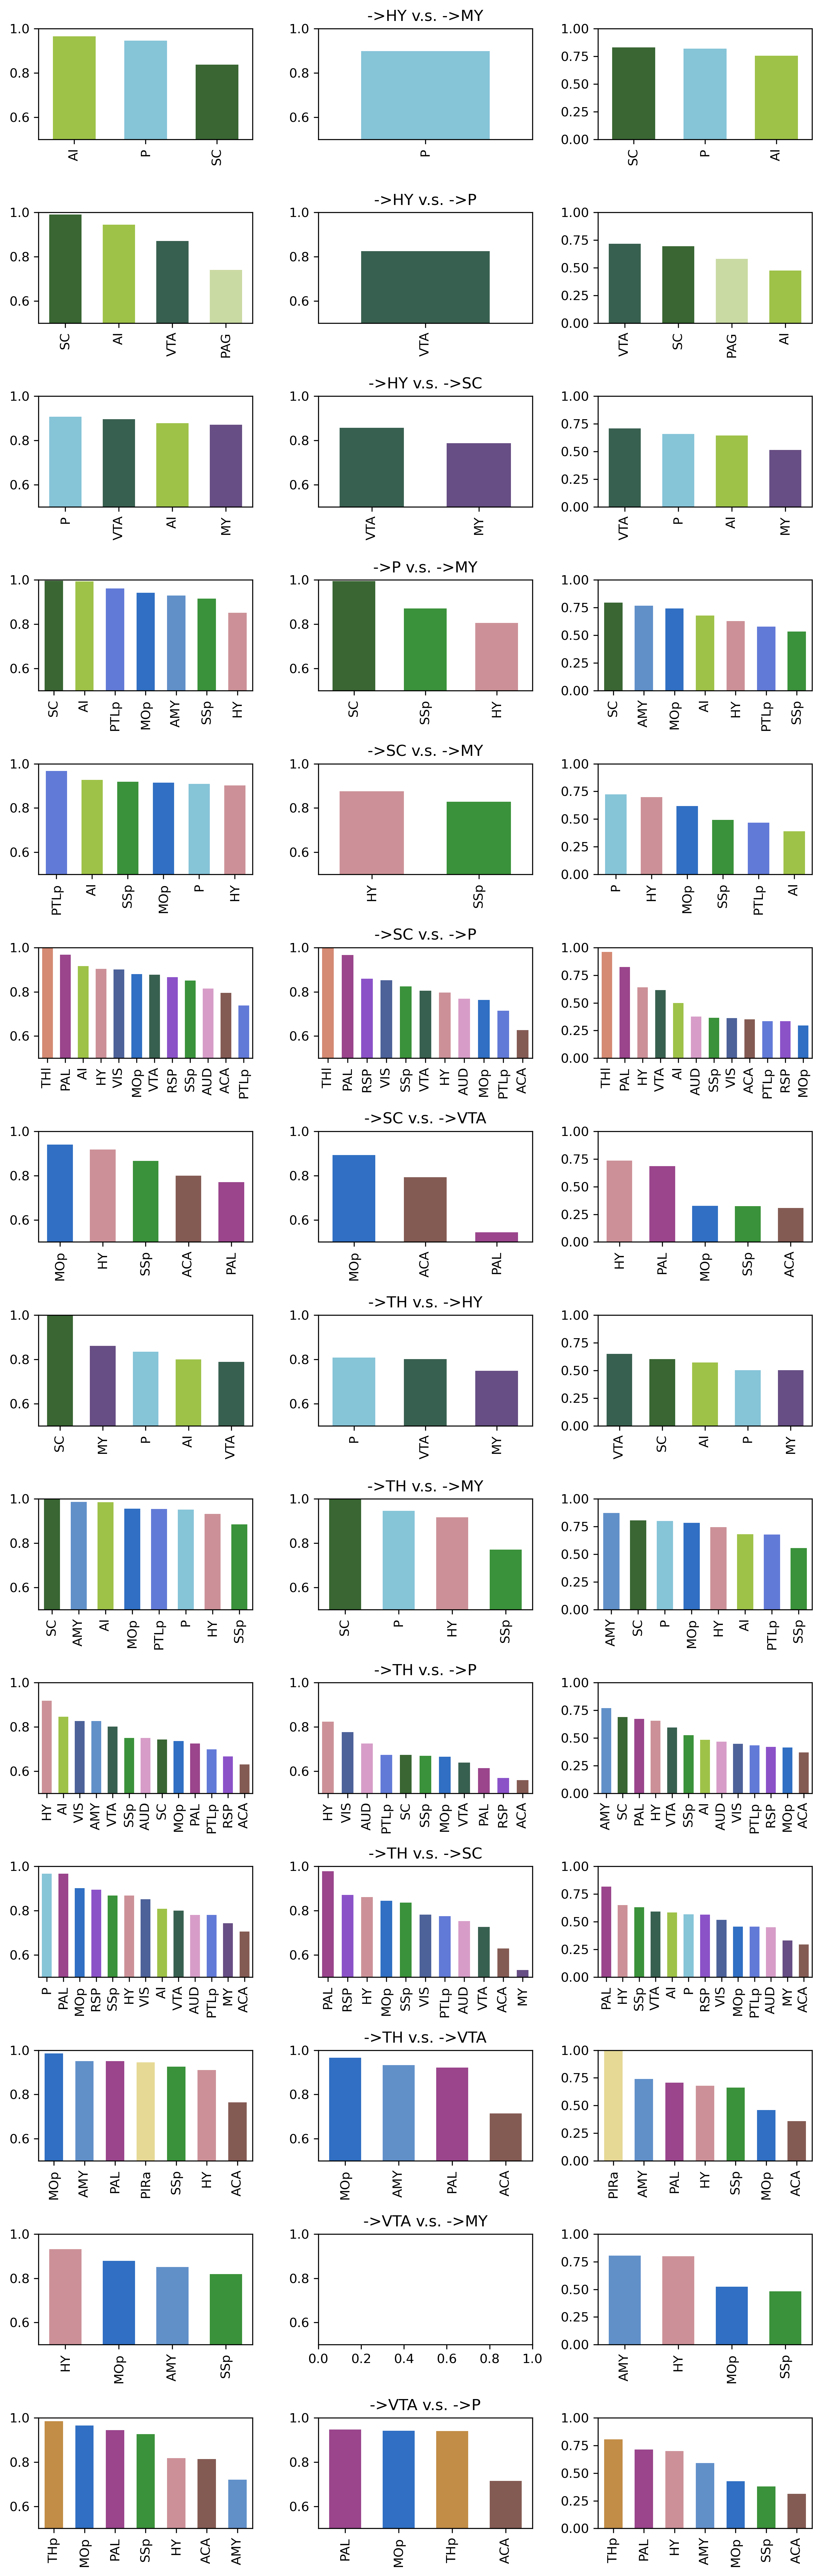

In [43]:
result_tmp = result.loc[(result['TargetGroup']=='ETET')]
result_tmp['TargetPair'] = result_tmp.index.str.split('-').str[1]
nrow = len(result_tmp['TargetPair'].unique())
fig, axes = plt.subplots(nrow, 3, figsize=(9,nrow*2), dpi=300, sharey='col')
for i,(group, df) in enumerate(result_tmp.groupby('TargetPair')):
    axes[i,1].set_title(f'->{group.replace("/", " v.s. ->")}')
    for j,yy in enumerate(['geneCH-X-comprep', 'geneCH-X-biorep', '1-L4OS']):
        ax = axes[i,j]
        tmp = df[~df[yy].isna()]
        if tmp.shape[0]>0:
            regorder = tmp.sort_values(yy)['Source'].values[::-1]
            sns.barplot(data=tmp, width=0.6, x='Source', y=yy, palette=colors, order=regorder, ax=ax)
            # ax.legend().remove()
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
            ax.set_ylim([[0.5, 0.5, 0][j], 1])

# axes[0].legend(ncol=3, bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.savefig('plot/ETpair_Source_barplot.pdf', transparent=True)


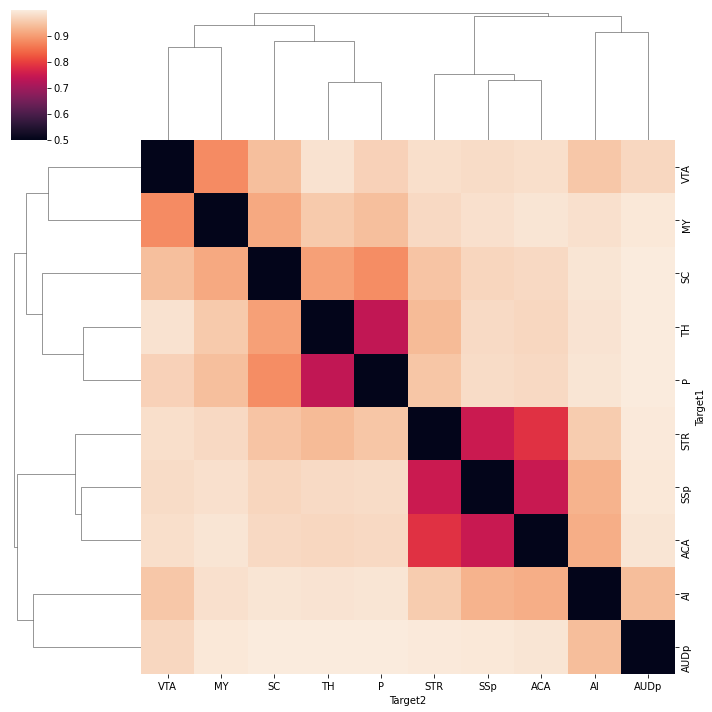

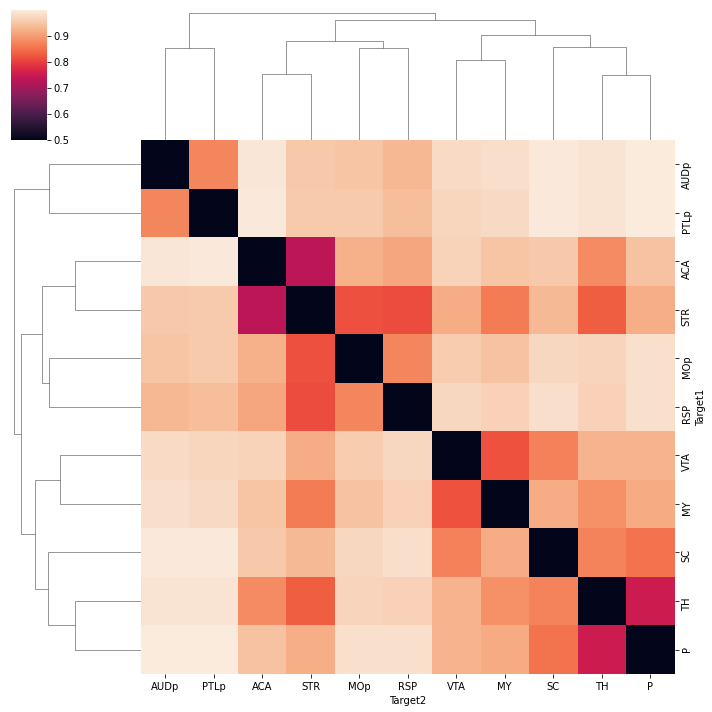

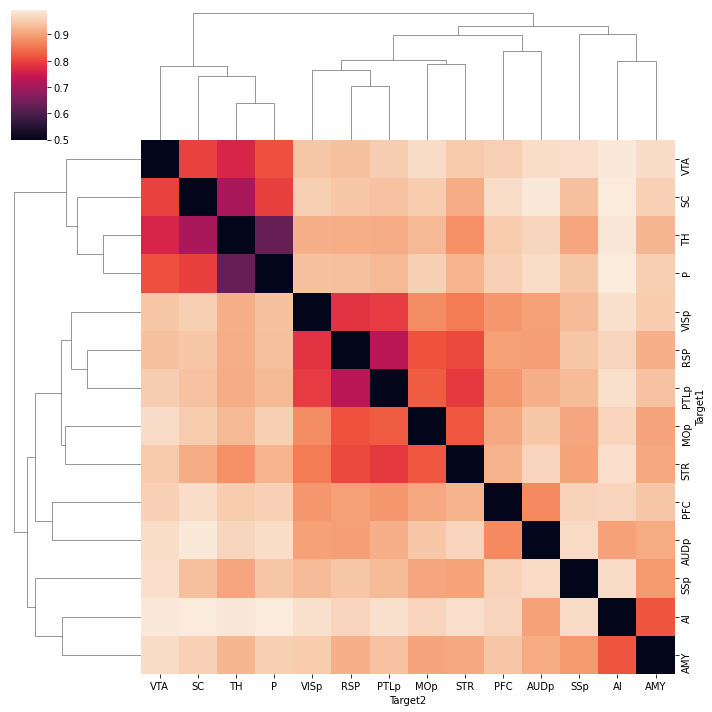

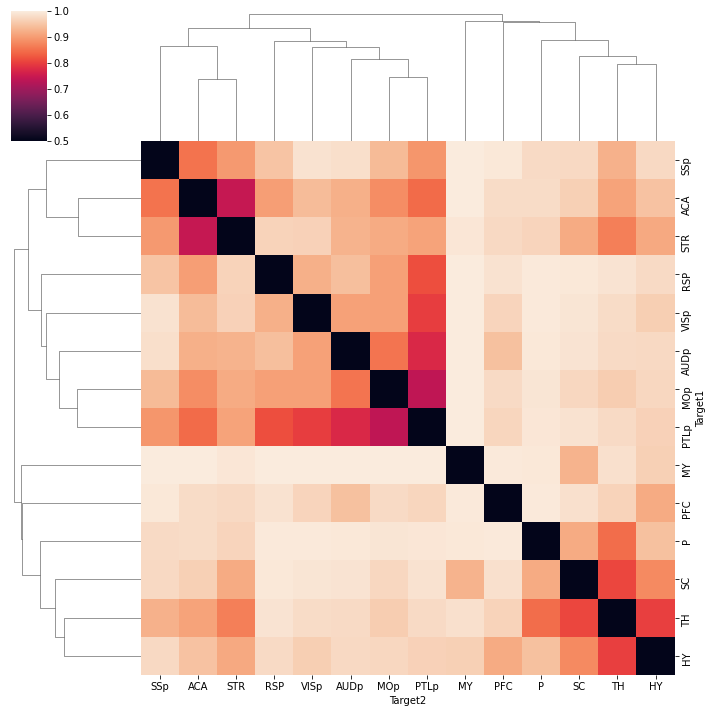

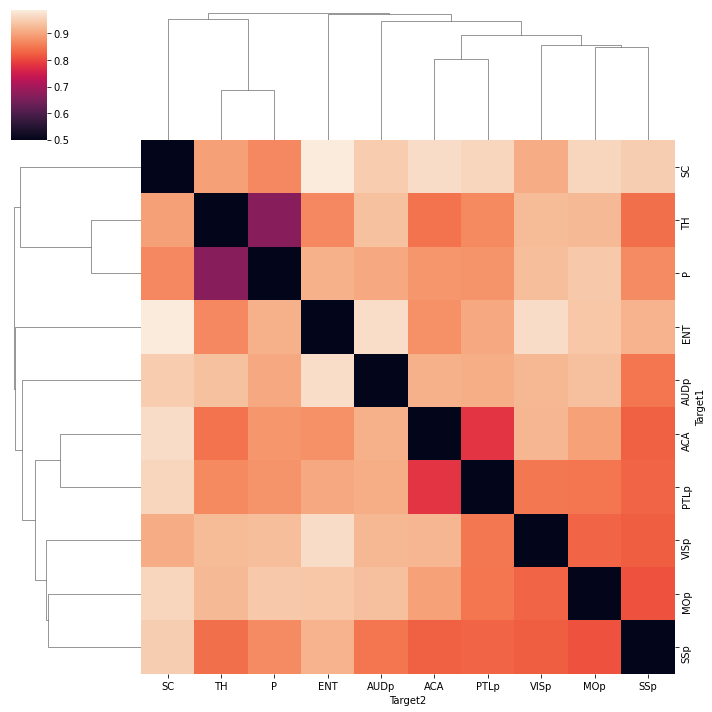

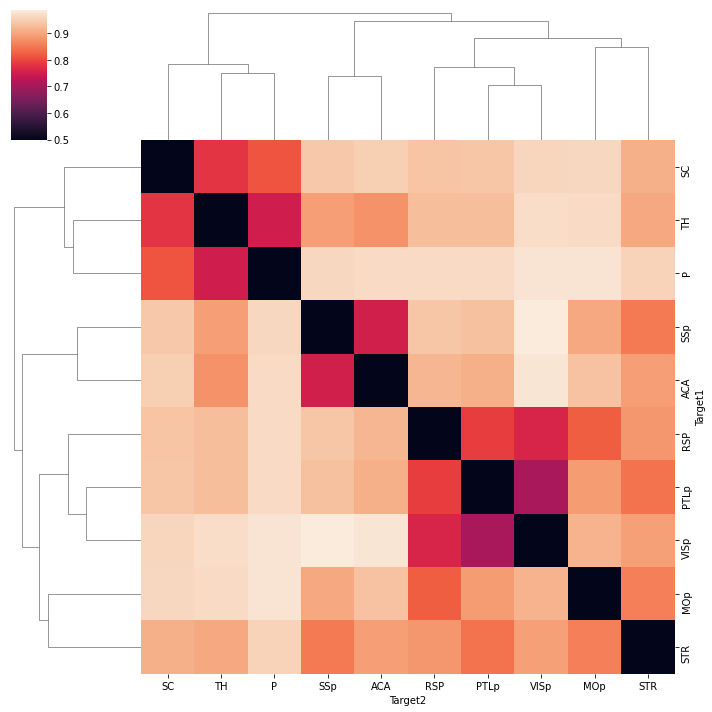

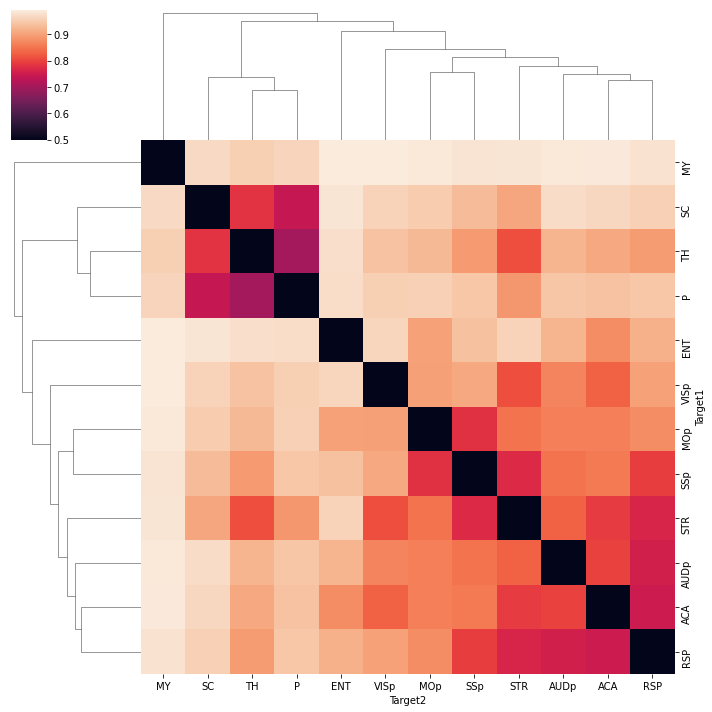

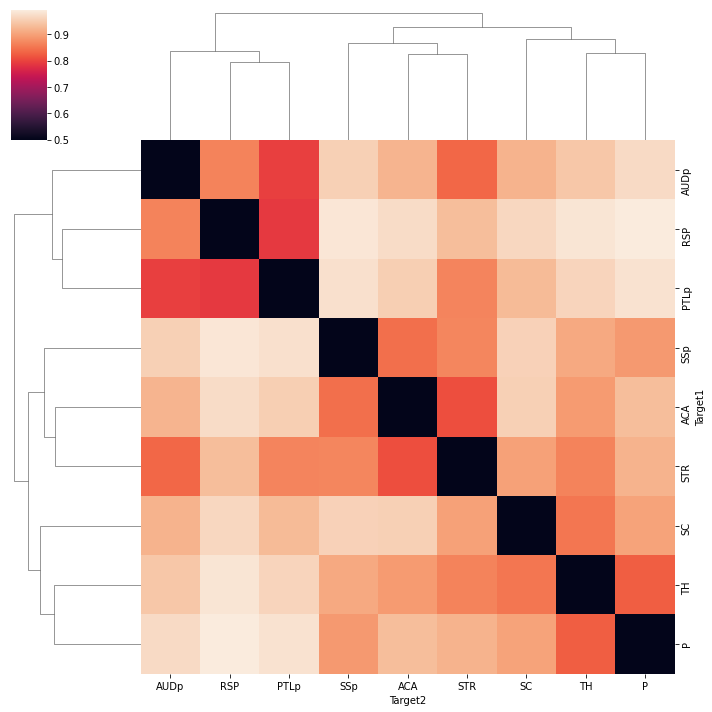

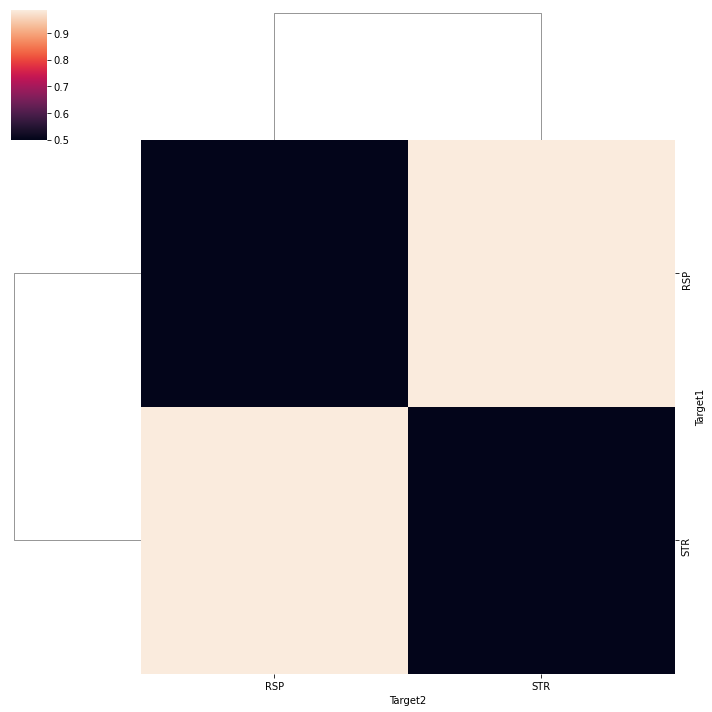

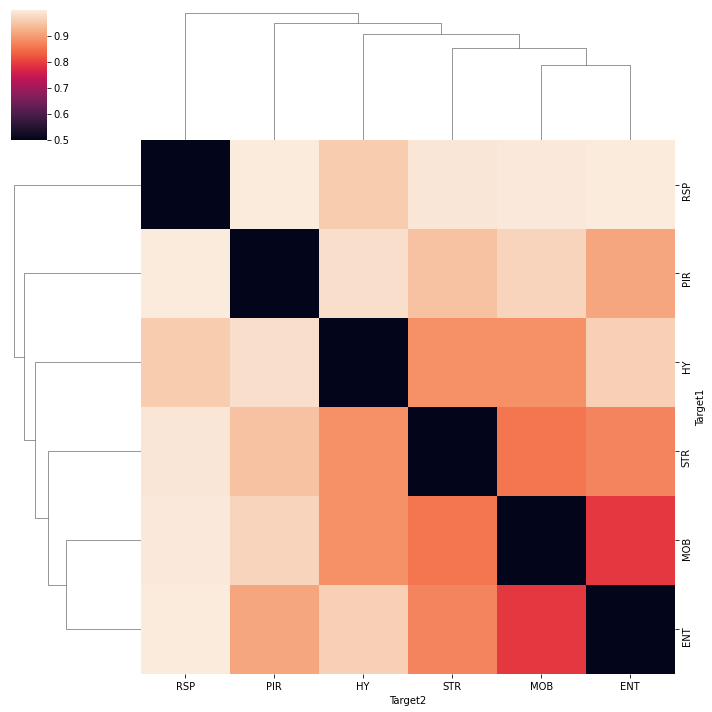

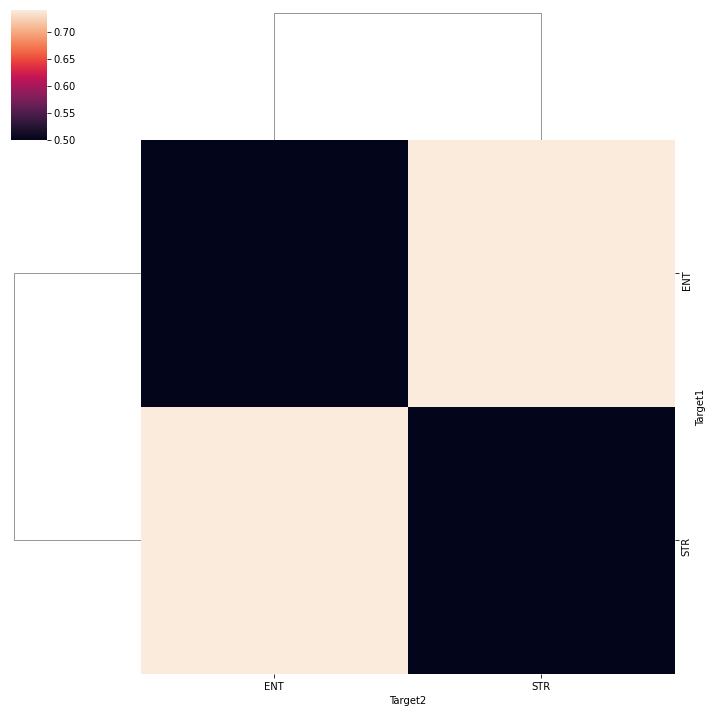

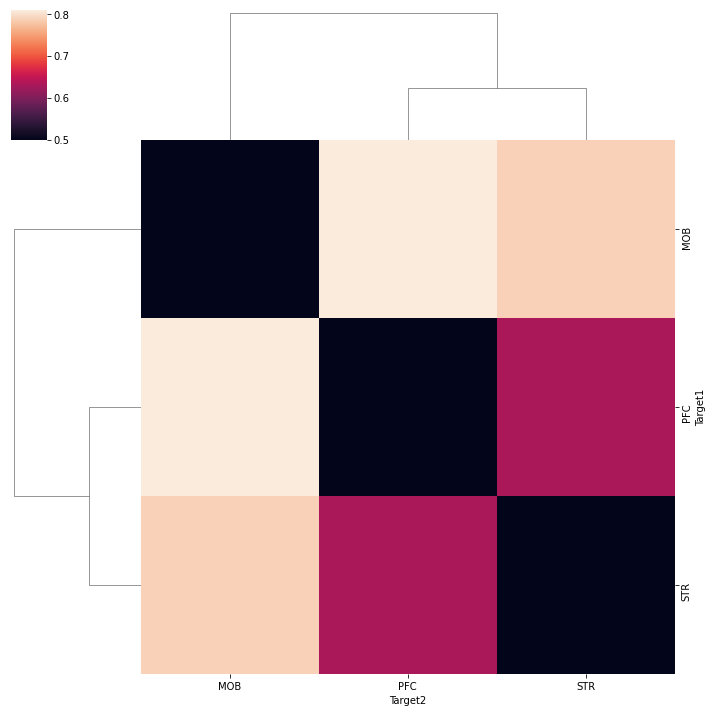

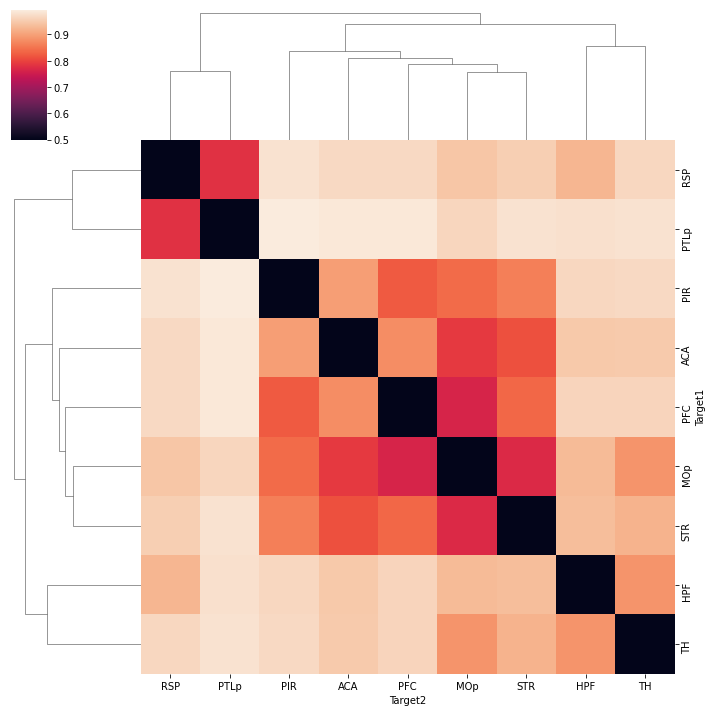

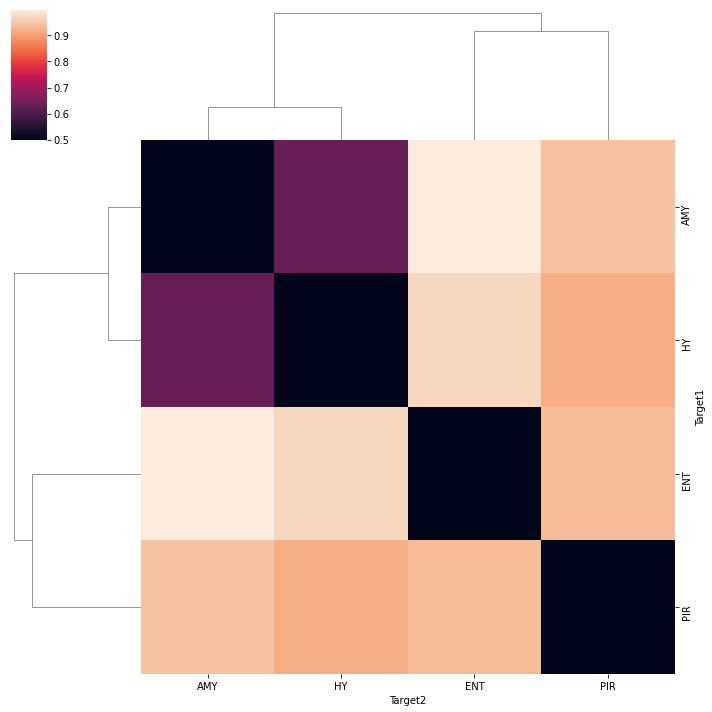

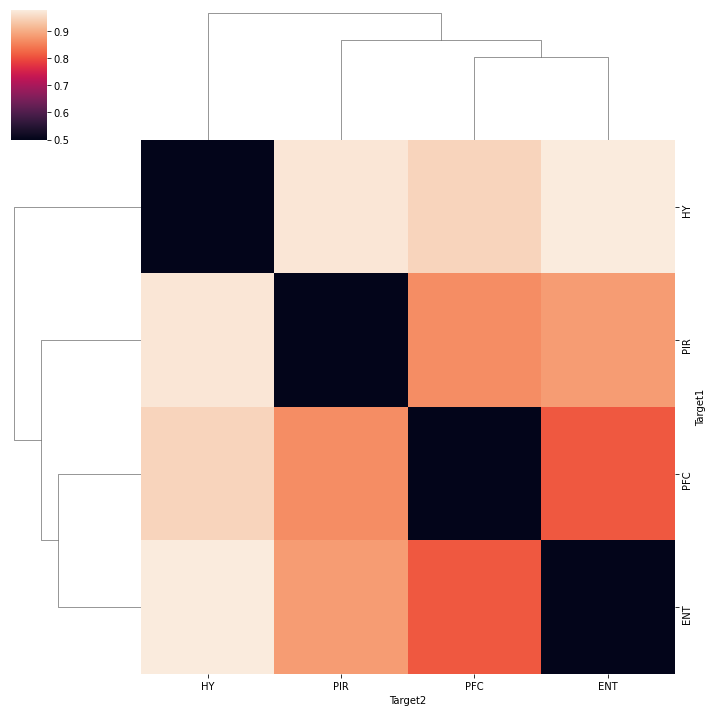

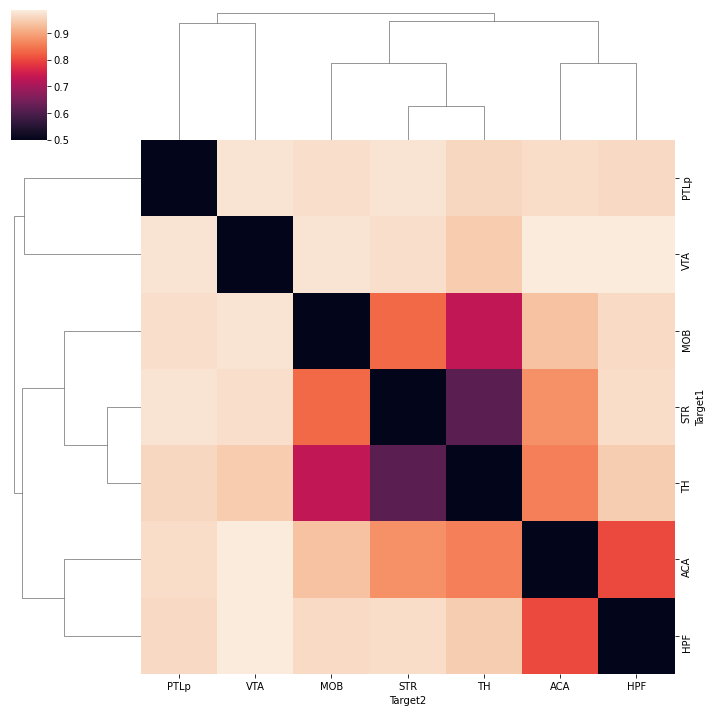

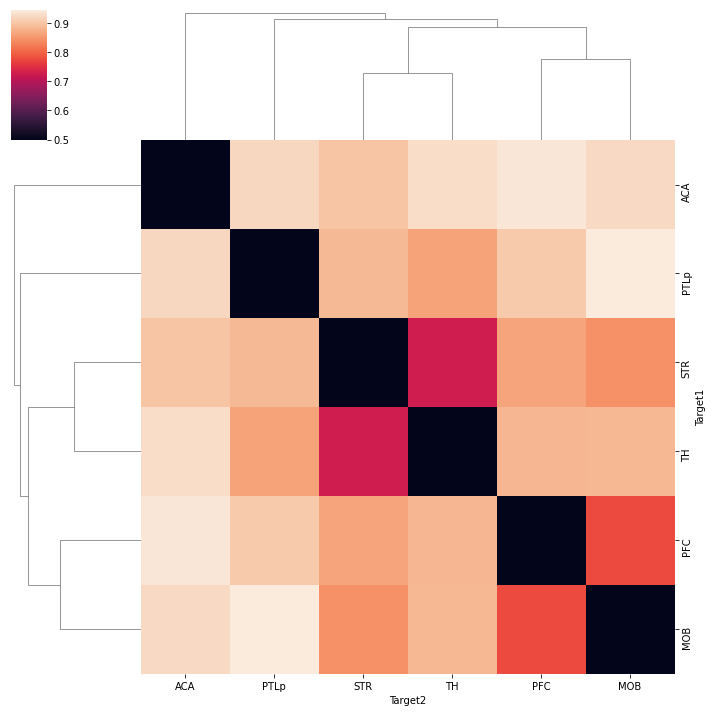

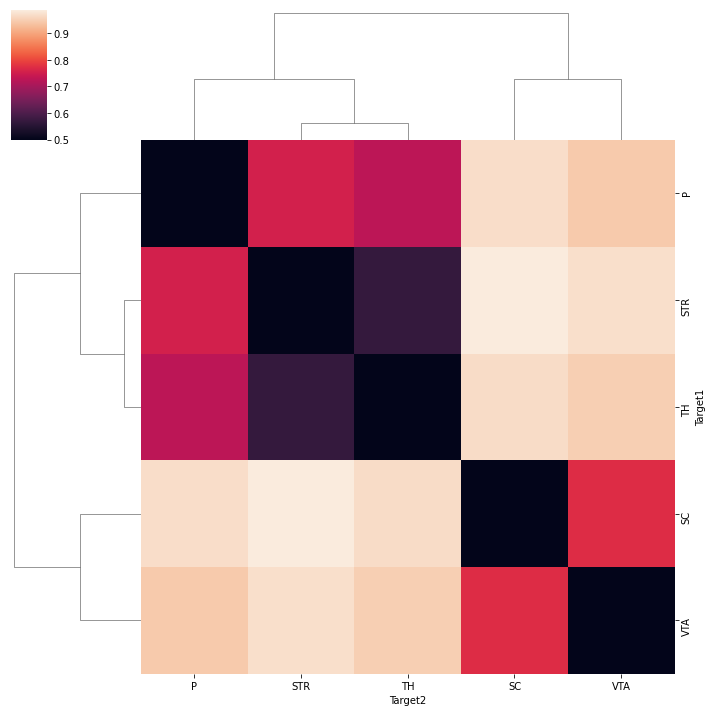

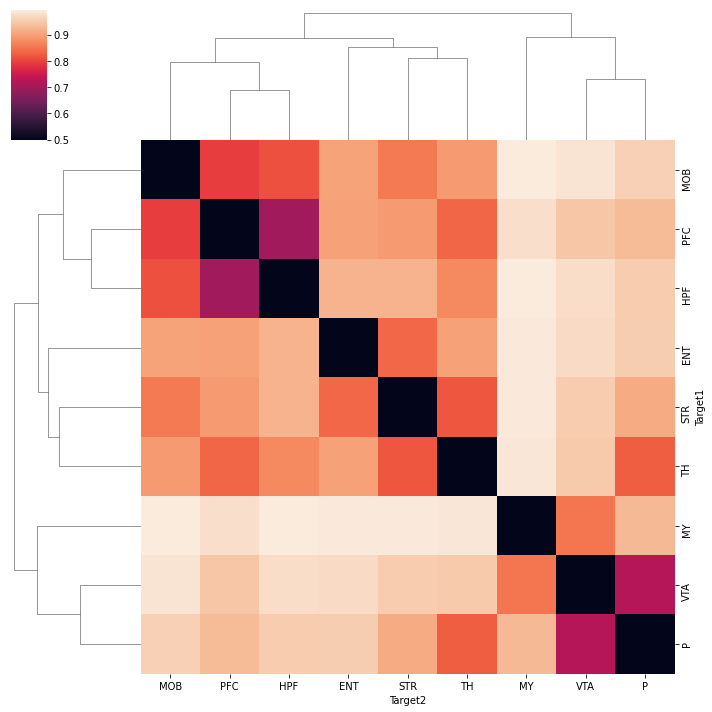

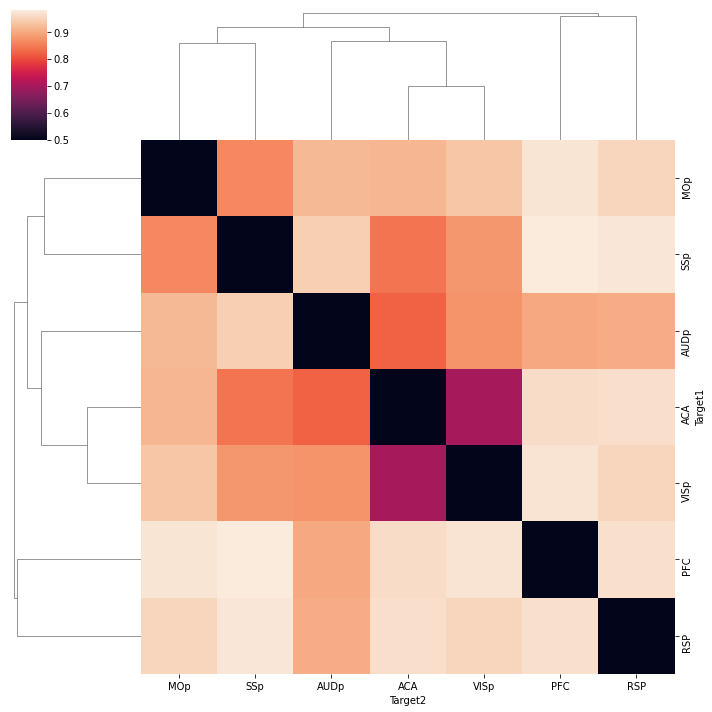

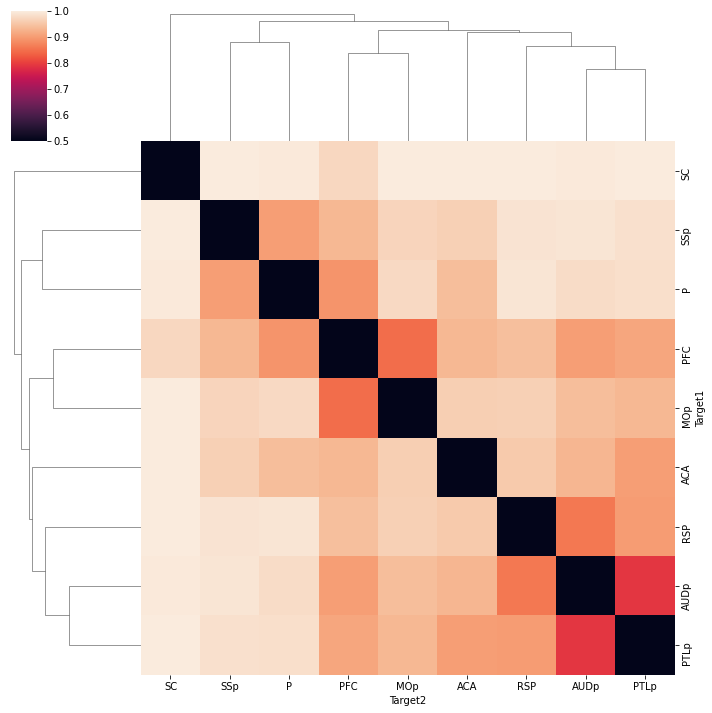

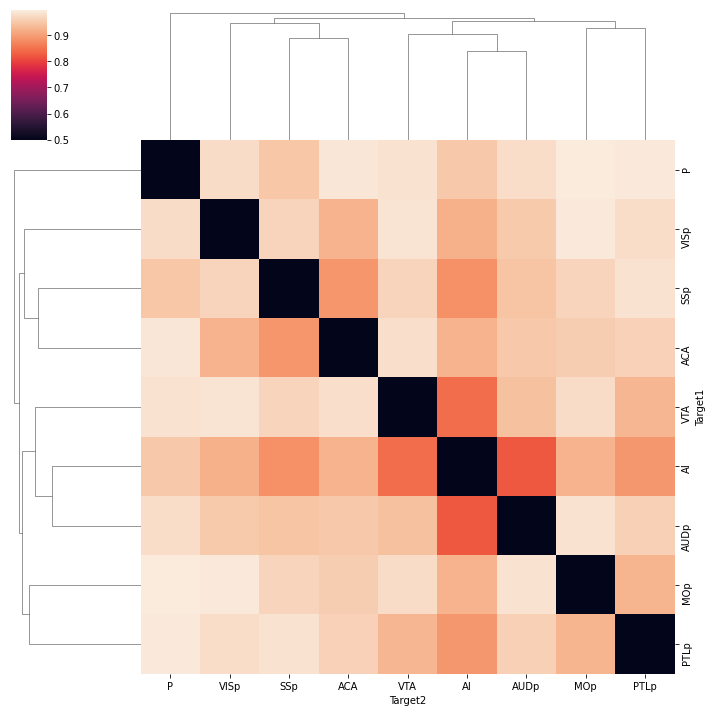

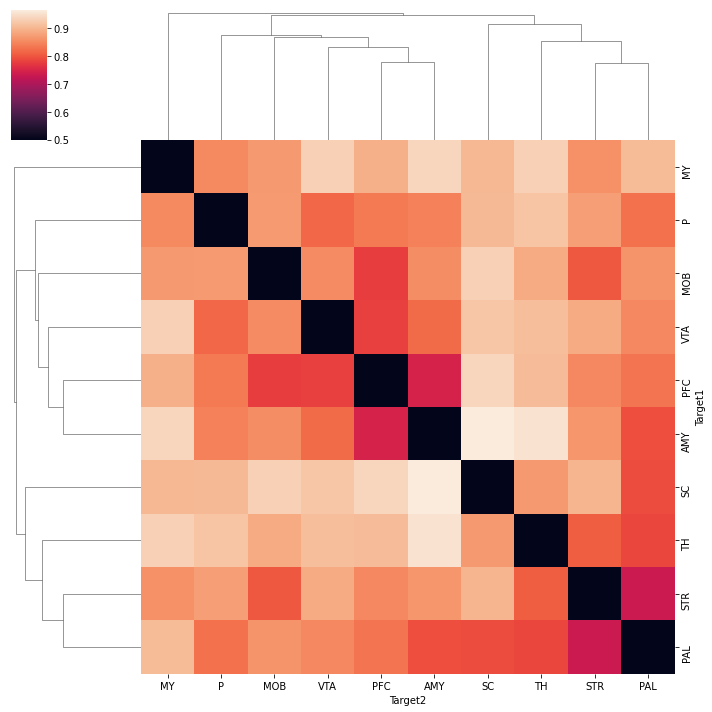

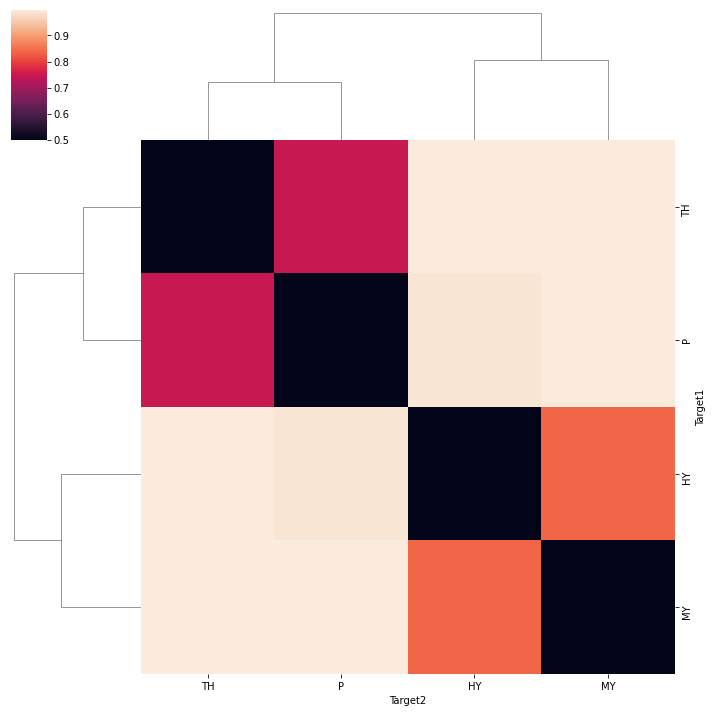

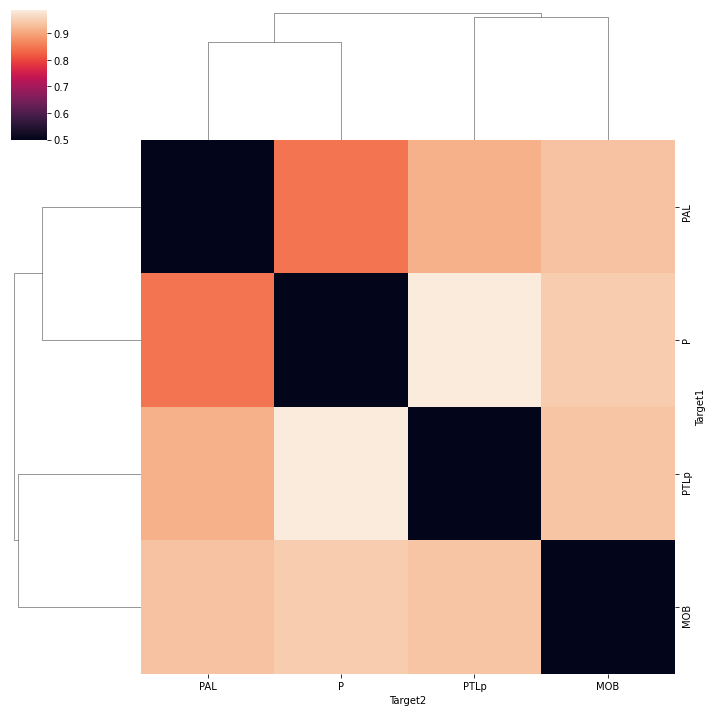

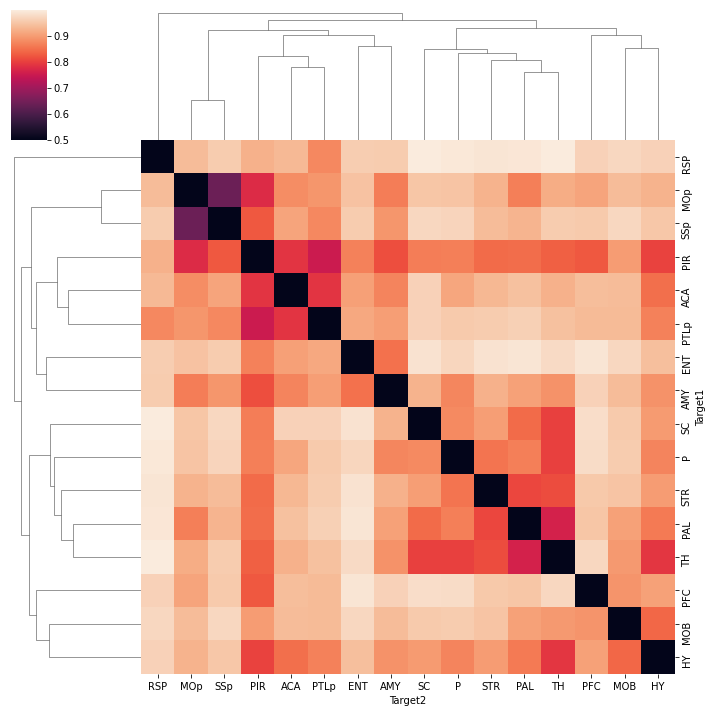

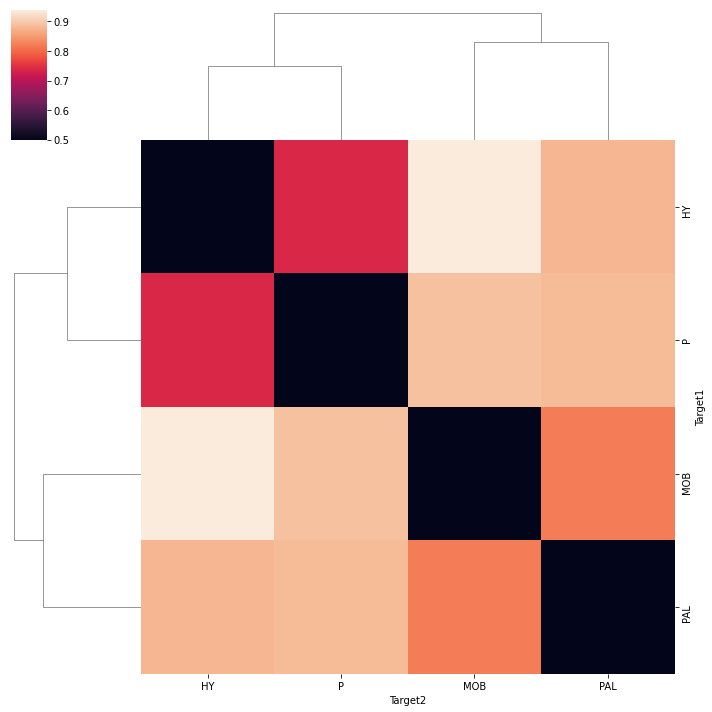

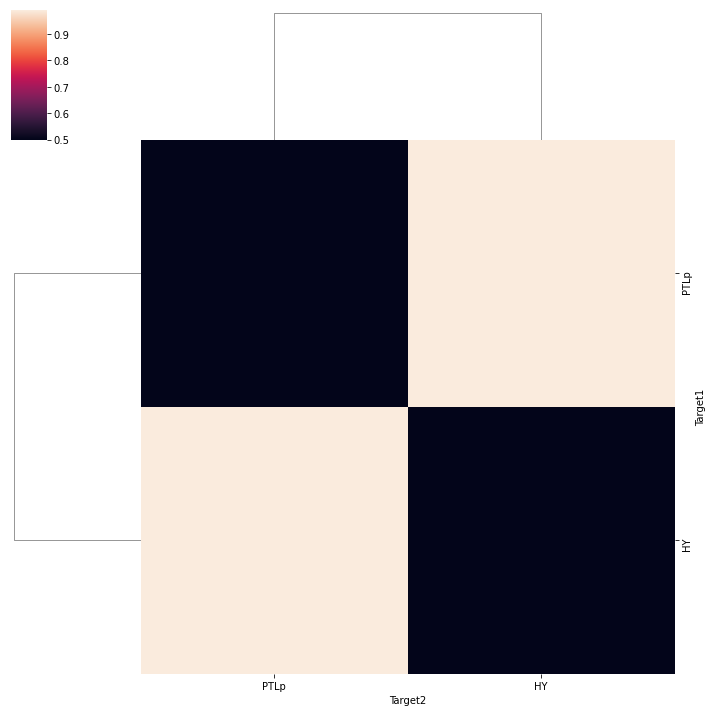

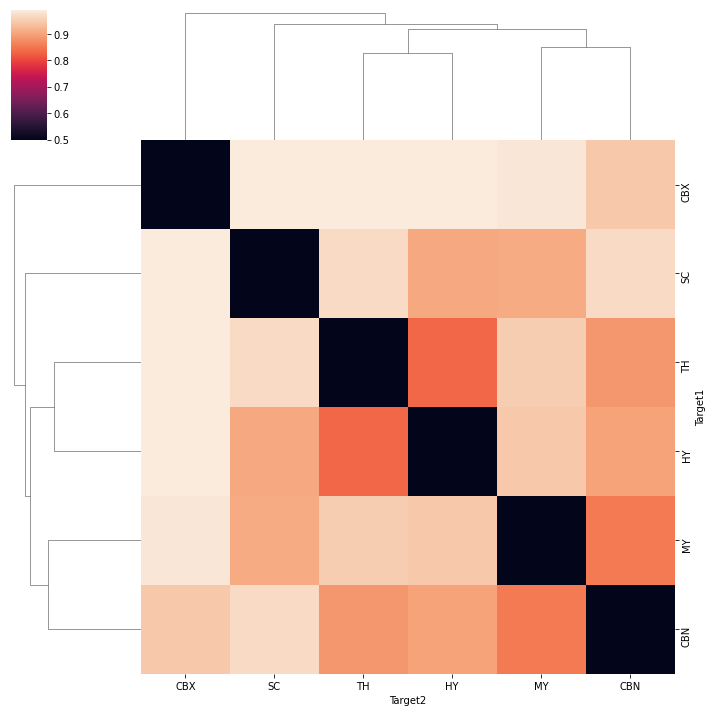

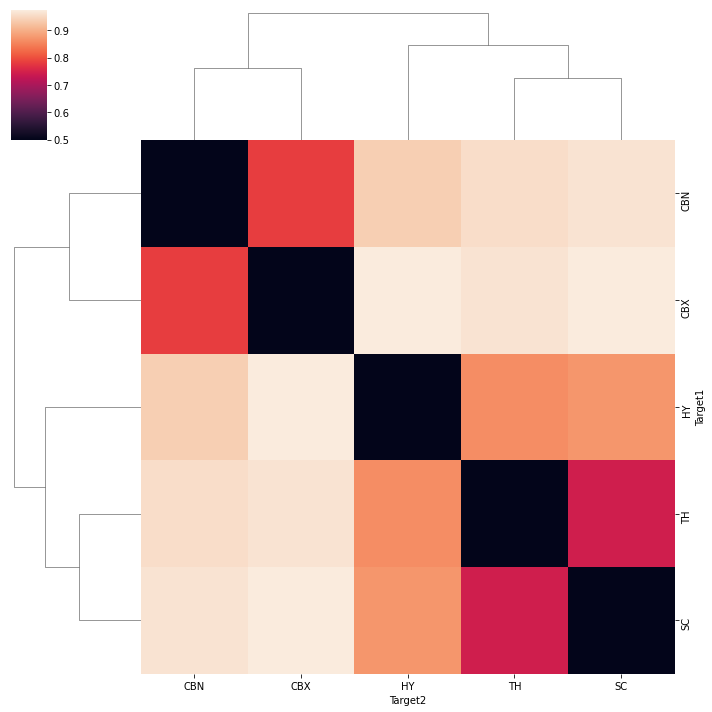

In [52]:
fig, axes = plt.subplots(len(regall), 3, figsize=(12, 4*len(regall)), dpi=300, gridspec_kw={'hspace':0.3})
for i,reg in enumerate(regall):
    tmp = result.loc[result['Source']==reg].fillna(0.5)
    tartmp = np.array([xx for xx in tarall if (xx in tmp['Target1'].values) or (xx in tmp['Target2'].values)])
    tmp = pd.concat([tmp, tmp.rename({'Target1':'Target2', 'Target2':'Target1'}, axis=1)], axis=0)
    
    data = tmp.set_index(['Target1', 'Target2'])['geneCH-X-comprep'].unstack().loc[tartmp, tartmp].fillna(0.5)
    cg = sns.clustermap(data)
    corder = cg.dendrogram_col.reordered_ind
    del cg
    # rorder = cg.dendrogram_row.reordered_ind
    ax = axes[i,0]
    ax.imshow(data.values[corder][:, corder], cmap='viridis', vmin=0.75, vmax=1.0)
    ax.set_xticks(np.arange(data.shape[0]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(tartmp[corder], rotation=90, ha='center')
    ax.set_yticklabels(tartmp[corder])
    
    data = tmp.set_index(['Target1', 'Target2'])['geneCH-X-biorep'].unstack().loc[tartmp, tartmp].fillna(0.5)
    ax = axes[i,1]
    ax.imshow(data.values[corder][:, corder], cmap='viridis', vmin=0.75, vmax=1.0)
    ax.set_xticks(np.arange(data.shape[0]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(tartmp[corder], rotation=90, ha='center')
    ax.set_yticklabels(tartmp[corder])
    ax.set_title(reg)
    
    data = tmp.set_index(['Target1', 'Target2'])['1-L4OS'].unstack().loc[tartmp, tartmp].fillna(0.5)
    ax = axes[i,2]
    ax.imshow(data.values[corder][:, corder], cmap='viridis', vmin=0.3, vmax=1.0)
    ax.set_xticks(np.arange(data.shape[0]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(tartmp[corder], rotation=90, ha='center')
    ax.set_yticklabels(tartmp[corder])

for i,ax in enumerate(axes[0]):
    ax.set_title(['CompRep', 'BioRep\nMOp', '1-OS'][i])

# plt.tight_layout()
fig.savefig('plot/TargetPairROC.pdf', transparent='True')
